load the data


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive
import panel as pn
import statistics_modules as pm
import statsmodels.api as sm
from IPython.display import display


In [ ]:
def get_config():
    with open("config.yaml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()

df_before_plaque = pd.read_csv(config['plaque'])
df_after_plaque = pd.read_csv(config['plaque2'])

df1 = pd.read_csv(config['gum_bleeding'])
df2 = pd.read_csv(config['gum_bleeding2'])

df_before_ph = pd.read_csv(config['ph'])
df_after_ph = pd.read_csv(config['ph2'])



# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']

In [ ]:
# # Function to plot data for selected participant for pH plots
# def plot_ph_data(participant):
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
#     if participant in df_before_ph.columns:
#         df_before_ph_sorted = df_before_ph.sort_values(by='Weeks').dropna()
#         df_before_ph_sorted['Weeks'] = pd.to_datetime(df_before_ph_sorted['Weeks'])
#         weeks_before_ph = df_before_ph_sorted['Weeks'].dt.strftime('%d-%m')
#         axes[0].plot(weeks_before_ph, df_before_ph_sorted[participant], marker='o', label='Before probiotics', color='blue')

#     if participant in df_after_ph.columns:
#         df_after_ph_sorted = df_after_ph.sort_values(by='Weeks').dropna()
#         df_after_ph_sorted['Weeks'] = pd.to_datetime(df_after_ph_sorted['Weeks'])
#         weeks_after_ph = df_after_ph_sorted['Weeks'].dt.strftime('%d-%m')
#         axes[1].plot(weeks_after_ph, df_after_ph_sorted[participant], marker='o', label='After probiotics', color='green')

#     axes[0].set_title('pH before probiotics')
#     axes[0].set_xlabel('Date')
#     axes[0].set_ylabel('pH')
#     axes[0].legend()

#     axes[1].set_title('pH after probiotics')
#     axes[1].set_xlabel('Date')
#     axes[1].set_ylabel('pH')
#     axes[1].legend()
   
#     return fig

# # Function to plot data for selected participant for gum bleeding plots
# def plot_gum_bleeding_data(participant):
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
#     if participant in df1.columns and participant in df2.columns:
#         df1_sorted = df1.sort_values(by='Weeks').dropna()
#         df1_sorted['Weeks'] = pd.to_datetime(df1_sorted['Weeks'])
#         weeks_before_gumbleeding = df1_sorted['Weeks'].dt.strftime('%d-%m')
#         y_values1 = df1_sorted[participant].map({'Yes': 1, 'yes': 1, 'No': 0, 'no': 0})

#         df2_sorted = df2.sort_values(by='Weeks').dropna()
#         df2_sorted['Weeks'] = pd.to_datetime(df2_sorted['Weeks'])
#         weeks_after_gumbleeding = df2_sorted['Weeks'].dt.strftime('%d-%m')
#         y_values2 = df2_sorted[participant].map({'Yes': 1, 'yes': 1, 'No': 0, 'no': 0})
       
#         # Plot for the first CSV
#         axes[0].scatter(weeks_before_gumbleeding, y_values1, c=y_values1, cmap='coolwarm', edgecolor='k', label='Before probiotics')

#         # Plot for the second CSV
#         axes[1].scatter(weeks_after_gumbleeding, y_values2, c=y_values2, cmap='coolwarm', edgecolor='k', label='After probiotics')

#     axes[0].set_title('Gum Bleeding')
#     axes[0].set_xlabel('Date')
#     axes[0].set_ylabel('Gum Bleeding (Yes=1, No=0)')
#     axes[0].set_yticks([0, 1])
#     axes[0].tick_params(axis='x', rotation=90)
#     axes[0].legend()

#     axes[1].set_title('Gum Bleeding')
#     axes[1].set_xlabel('Date')
#     axes[1].set_ylabel('Gum Bleeding (Yes=1, No=0)')
#     axes[1].set_yticks([0,1])
#     axes[1].tick_params(axis='x', rotation=90)
#     axes[1].legend()

#     return fig

# # Function to plot data for selected participant for plaque plots
# def plot_plaque_data(participant):
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
#     if participant in df_before_plaque.columns:
#         df_before_plaque_sorted = df_before_plaque.sort_values(by='Weeks').dropna()
#         df_before_plaque_sorted['Weeks'] = pd.to_datetime(df_before_plaque_sorted['Weeks'])
#         weeks_before_plaque = df_before_plaque_sorted['Weeks'].dt.strftime('%d-%m')
#         axes[0].plot(weeks_before_plaque, df_before_plaque_sorted[participant], marker='o', label='Before probiotics', color='blue')

#     if participant in df_after_plaque.columns:
#         df_after_plaque_sorted = df_after_plaque.sort_values(by='Weeks').dropna()
#         df_after_plaque_sorted['Weeks'] = pd.to_datetime(df_after_plaque_sorted['Weeks'])
#         weeks_after_plaque = df_after_plaque_sorted['Weeks'].dt.strftime('%d-%m')
#         axes[1].plot(weeks_after_plaque, df_after_plaque_sorted[participant], marker='o', label='After probiotics', color='green')

#     axes[0].set_title('Amount of plaque before using probiotics')
#     axes[0].set_xlabel('Date')
#     axes[0].set_ylabel('Amount of tooth with plaque')
#     axes[0].legend()

#     axes[1].set_title('Amount of plaque before using probiotics')
#     axes[1].set_xlabel('Date')
#     axes[1].set_ylabel('Amount of tooth with plaque')
#     axes[1].legend()

#     plt.tight_layout()
#     return fig

# #STATISTICS
# #Need no participant selector
# def plot_combined_violin():
#     fig = plt.figure(figsize=(12, 6))
#     df_before_ph_sorted = df_before_ph.sort_values(by='Weeks').dropna()
#     df_before_ph_sorted['Weeks'] = pd.to_datetime(df_before_ph_sorted['Weeks'])
#     # Prepare 'before' data
#     df_before_melted = df_before_ph_sorted.melt(id_vars=['Weeks'], var_name='Participant', value_name='pH_Values')
#     df_before_melted['Time'] = 'Before'

#     # Prepare 'after' data
#     df_after_ph_sorted = df_after_ph.sort_values(by='Weeks').dropna()
#     df_after_ph_sorted['Weeks'] = pd.to_datetime(df_after_ph_sorted['Weeks'])
#     df_after_melted = df_after_ph_sorted.melt(id_vars=['Weeks'], var_name='Participant', value_name='pH_Values')
#     df_after_melted['Time'] = 'After'

#     # Combine data
#     df_combined = pd.concat([df_before_melted, df_after_melted])

#     # Create violin plot
#     plt.figure(figsize=(15, 6))
#     sns.violinplot(x='Participant', y='pH_Values', hue='Time', data=df_combined, split=True, inner='quart')
#     plt.title('Combined Violin Plot of pH Values Before and After Probiotic Use')
#     plt.ylabel('pH Values')
#     plt.xlabel('Participant')
#     plt.legend(title='Time Period')
#     plt.xticks(rotation=45)

#     plt.tight_layout()
#     return fig

# def interactive_ds_qq_plot(participant):
#     """
#     This function uses the custom DS_Q_Q_Plot function from the ph_modules
#     for the selected participant's pH values before and after probiotic use.
#     """
#     fig = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#     if participant in df_before_ph.columns:
#         df_before_ph_sorted = df_before_ph.sort_values(by='Weeks').dropna()
#         df_before_ph_sorted['Weeks'] = pd.to_datetime(df_before_ph_sorted['Weeks'])

#     if participant in df_after_ph.columns:
#         df_after_ph_sorted = df_after_ph.sort_values(by='Weeks').dropna()
#         df_after_ph_sorted['Weeks'] = pd.to_datetime(df_after_ph_sorted['Weeks'])

#     participant_str = str(participant)  # Convert to string if not already
   
#     # Extracting data for the selected participant
#     data_before = df_before_ph_sorted[participant_str].dropna()
#     data_after = df_after_ph_sorted[participant_str].dropna()
   
#     # Displaying custom Q-Q Plots for before and after data
#     print(f"Q-Q Plot for {participant_str} - Before Probiotic Use:")
#     pm.DS_Q_Q_Plot(data_before, est='robust')
   
#     print(f"Q-Q Plot for {participant_str} - After Probiotic Use:")
#     pm.DS_Q_Q_Plot(data_after, est='robust')
    
#     plt.tight_layout()
#     return fig

# def interactive_anderson_darling_visualization(participant):
#     """
#     This function applies the Anderson-Darling normality test to the selected
#     participant's pH values before and after probiotic use, and visualizes the results.
#     """
#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#     if participant in df_before_ph.columns:
#         df_before_ph_sorted = df_before_ph.sort_values(by='Weeks').dropna()
#         df_before_ph_sorted['Weeks'] = pd.to_datetime(df_before_ph_sorted['Weeks'])
#     if participant in df_after_ph.columns:
#         df_after_ph_sorted = df_after_ph.sort_values(by='Weeks').dropna()
#         df_after_ph_sorted['Weeks'] = pd.to_datetime(df_after_ph_sorted['Weeks'])
#     participant_str = str(participant)
   
#     # Extract data for the selected participant
#     data_before = df_before_ph_sorted[participant_str].dropna()
#     data_after = df_after_ph_sorted[participant_str].dropna()
   
#     # Run the Anderson-Darling test for 'before' and 'after' data
#     result_before = pm.DS_AndersonDarling_test_normal(data_before)
#     result_after = pm.DS_AndersonDarling_test_normal(data_after)
    
   
#     # Assuming the function returns a tuple where the first value is the statistic and the second is the p-value
#     axes[0].bar(['Statistic', 'P-Value'], [result_before[0], result_before[1]], color='blue')
#     axes[0].set_title(f'{participant_str} - Before Probiotic Use')
#     axes[0].set_ylim([0, max(result_before[0], result_before[1], 1)])
   
#     axes[1].bar(['Statistic', 'P-Value'], [result_after[0], result_after[1]], color='green')
#     axes[1].set_title(f'{participant_str} - After Probiotic Use')
#     axes[1].set_ylim([0, max(result_after[0], result_after[1], 1)])
   
#     for ax in axes:
#         ax.set_ylabel('Test Results')
#         for p in ax.patches:
#             ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()),
#                         ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
#                         textcoords='offset points')

#     plt.tight_layout()
#     return fig


# def interactive_mann_whitney_test_and_visualize(participant):
#     """
#     Applies the DS_2sample_MannWhitney_test_medians function from ph_modules
#     to compare the pH values for the selected participant before and after probiotic use,
#     and visualizes the comparison.
#     """
#     fig, ax = plt.subplots(figsize=(6, 4))
#     if participant in df_before_ph.columns:
#         df_before_ph_sorted = df_before_ph.sort_values(by='Weeks').dropna()
#         df_before_ph_sorted['Weeks'] = pd.to_datetime(df_before_ph_sorted['Weeks'])
   
#     if participant in df_after_ph.columns:
#         df_after_ph_sorted = df_after_ph.sort_values(by='Weeks').dropna()
#         df_after_ph_sorted['Weeks'] = pd.to_datetime(df_after_ph_sorted['Weeks'])

#     participant_str = str(participant)
   
#     # Extracting data for the selected participant
#     data_before = df_before_ph_sorted[participant_str].dropna()
#     data_after = df_after_ph_sorted[participant_str].dropna()
   
#     # Running the Mann-Whitney U test
#     test_result = pm.DS_2sample_MannWhitney_test_medians(data_before, data_after)
#     u_statistic, p_value, *rest = test_result
   
#     # Print the test result
#     print(f"Mann-Whitney U Test for {participant_str} - Comparing Before and After Probiotic Use:")
#     print(f"U Statistic: {u_statistic}, P-value: {p_value}")

    
#     medians = [data_before.median(), data_after.median()]
#     ax.bar(['Before', 'After'], medians, color=['blue', 'green'])
#     ax.set_title(f'Median pH Values for {participant_str} Before and After Probiotic Use')
#     ax.set_ylabel('Median pH Value')
#     for i, median in enumerate(medians):
#         ax.text(i, median + 0.05, f'{median:.2f}', ha='center', va='bottom')
   
#     plt.tight_layout()
#     return fig


# # Function to update plot based on selected participant
# def update_plot(event):
#     participant = event.new
#     if dashboard.main[0] == dashboard_layout_data:
#         fig1 = plot_ph_data(participant)
#         fig2 = plot_gum_bleeding_data(participant)
#         fig3 = plot_plaque_data(participant)
#         plot_pane1.object = fig1
#         plot_pane2.object = fig2
#         plot_pane3.object = fig3
#     elif dashboard.main[0] == dashboard_layout_statistics:
#         fig4 = plot_combined_violin()
#         fig5 = interactive_ds_qq_plot(participant)
#         fig6 = interactive_anderson_darling_visualization(participant)
#         fig7 = interactive_mann_whitney_test_and_visualize(participant)
#         plot_pane4.object = fig4
#         plot_pane5.object = fig5
#         plot_pane6.object = fig6
#         plot_pane7.object = fig7

# def update_dashboard(event):
#     option = select_option.value
#     if option == 'Data':
#         dashboard.main[:] = [dashboard_layout_data]
#     elif option == 'Statistics':
#         dashboard.main[:] = [dashboard_layout_statistics]

# # Create widgets for participants
# participants = df_before_ph.columns[1:].tolist()
# participant_selector = pn.widgets.Select(
#     options=participants,
#     value=participants[0],
#     name='Participant'
# )

# select_option = pn.widgets.Select(
#     options=['Data', 'Statistics'],
#     value= 'Data',
#     name= 'Select Option'
# )

# #register function update_plot as an event handler for changes in the Dropdown widget
# participant_selector.param.watch(update_plot, 'value')
# select_option.param.watch(update_dashboard, 'value')

# #define plot panes

# plot_pane1 = pn.pane.Matplotlib()
# plot_pane2 = pn.pane.Matplotlib()
# plot_pane3 = pn.pane.Matplotlib()
# plot_pane4 = pn.pane.Matplotlib()
# plot_pane5 = pn.pane.Matplotlib()
# plot_pane6 = pn.pane.Matplotlib()
# plot_pane7 = pn.pane.Matplotlib()

# participant_row= pn.Row(
#     pn.Column(participant_selector),
#     css_classes = ['panel-widget-box']
# )

# row_ph = pn.Row(
#     pn.Column('# pH data', plot_pane1),
#     css_classes=['panel-widget-box']
# )

# row_gumbleeding = pn.Row(
#     pn.Column('# Gum Bleeding data', plot_pane2),
#     css_classes=['panel-widget-box']
# )

# row_plaque = pn.Row(
#     pn.Column('# Plaque data', plot_pane3),
#     css_classes=['panel-widget-box']
# )

# row_violin =pn.Row(
#     pn.Column ('# Violin plot', plot_pane4),
#     css_classes=['panel-widget-box']
# )

# row_qq_plt = pn.Row(
# pn.Column ('# QQ_plot', plot_pane5),
#     css_classes=['panel-widget-box']
# )

# row_anderson_darling = pn.Row(
# pn.Column ('# Anderson_Darling', plot_pane6),
#     css_classes=['panel-widget-box']
# )

# row_mann_whithey = pn.Row(
# pn.Column ('# Mann_Whitney', plot_pane7),
#     css_classes=['panel-widget-box']
# )

# dashboard_layout_data = pn.Column(
#     participant_row,
#     pn.Row(row_ph, row_plaque),
#     row_gumbleeding,
#     css_classes=['panel-widget-box']
# )

# dashboard_layout_statistics = pn.Column(
#     participant_selector,
#     pn.Row(row_violin, row_qq_plt),
#     row_anderson_darling, row_mann_whithey,
#     css_classes=['panel-widget-box']
# )

# dashboard = pn.template.BootstrapTemplate(title='Dashboard MicroMouth Marvels', header_background='lightblue')
# dashboard.sidebar.append(select_option)
# dashboard.main.append(dashboard_layout_data)
# dashboard.show()



In [ ]:
#Data panel

# Function to plot data for selected participant for pH plots
def plot_ph_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
    if participant in df_before_ph.columns:
        df_before_ph_sorted = df_before_ph.sort_values(by='Weeks').dropna()
        df_before_ph_sorted['Weeks'] = pd.to_datetime(df_before_ph_sorted['Weeks'])
        weeks_before_ph = df_before_ph_sorted['Weeks'].dt.strftime('%d-%m')
        axes[0].plot(weeks_before_ph, df_before_ph_sorted[participant], marker='o', label='Before probiotics', color='blue')

    if participant in df_after_ph.columns:
        df_after_ph_sorted = df_after_ph.sort_values(by='Weeks').dropna()
        df_after_ph_sorted['Weeks'] = pd.to_datetime(df_after_ph_sorted['Weeks'])
        weeks_after_ph = df_after_ph_sorted['Weeks'].dt.strftime('%d-%m')
        axes[1].plot(weeks_after_ph, df_after_ph_sorted[participant], marker='o', label='After probiotics', color='green')

    axes[0].set_title('pH before probiotics')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('pH')
    axes[0].legend()

    axes[1].set_title('pH after probiotics')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('pH')
    axes[1].legend()
   
    return fig

# Function to plot data for selected participant for gum bleeding plots
def plot_gum_bleeding_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
    if participant in df1.columns and participant in df2.columns:
        df1_sorted = df1.sort_values(by='Weeks').dropna()
        df1_sorted['Weeks'] = pd.to_datetime(df1_sorted['Weeks'])
        weeks_before_gumbleeding = df1_sorted['Weeks'].dt.strftime('%d-%m')
        y_values1 = df1_sorted[participant].map({'Yes': 1, 'yes': 1, 'No': 0, 'no': 0})

        df2_sorted = df2.sort_values(by='Weeks').dropna()
        df2_sorted['Weeks'] = pd.to_datetime(df2_sorted['Weeks'])
        weeks_after_gumbleeding = df2_sorted['Weeks'].dt.strftime('%d-%m')
        y_values2 = df2_sorted[participant].map({'Yes': 1, 'yes': 1, 'No': 0, 'no': 0})
       
        # Plot for the first CSV
        axes[0].scatter(weeks_before_gumbleeding, y_values1, c=y_values1, cmap='coolwarm', edgecolor='k', label='Before probiotics')

        # Plot for the second CSV
        axes[1].scatter(weeks_after_gumbleeding, y_values2, c=y_values2, cmap='coolwarm', edgecolor='k', label='After probiotics')

    axes[0].set_title('Gum Bleeding')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Gum Bleeding (Yes=1, No=0)')
    axes[0].set_yticks([0, 1])
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].legend()

    axes[1].set_title('Gum Bleeding')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Gum Bleeding (Yes=1, No=0)')
    axes[1].set_yticks([0,1])
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].legend()

    return fig

# Function to plot data for selected participant for plaque plots
def plot_plaque_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
    if participant in df_before_plaque.columns:
        df_before_plaque_sorted = df_before_plaque.sort_values(by='Weeks').dropna()
        df_before_plaque_sorted['Weeks'] = pd.to_datetime(df_before_plaque_sorted['Weeks'])
        weeks_before_plaque = df_before_plaque_sorted['Weeks'].dt.strftime('%d-%m')
        axes[0].plot(weeks_before_plaque, df_before_plaque_sorted[participant], marker='o', label='Before probiotics', color='blue')

    if participant in df_after_plaque.columns:
        df_after_plaque_sorted = df_after_plaque.sort_values(by='Weeks').dropna()
        df_after_plaque_sorted['Weeks'] = pd.to_datetime(df_after_plaque_sorted['Weeks'])
        weeks_after_plaque = df_after_plaque_sorted['Weeks'].dt.strftime('%d-%m')
        axes[1].plot(weeks_after_plaque, df_after_plaque_sorted[participant], marker='o', label='After probiotics', color='green')

    axes[0].set_title('Amount of plaque before using probiotics')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Amount of tooth with plaque')
    axes[0].legend()

    axes[1].set_title('Amount of plaque before using probiotics')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Amount of tooth with plaque')
    axes[1].legend()

    plt.tight_layout()
    return fig

# Function to update plot based on selected participant
def update_plot(event):
    participant = event.new
    fig1 = plot_ph_data(participant)
    fig2 = plot_gum_bleeding_data(participant)
    fig3 = plot_plaque_data(participant)
    plot_pane1.object = fig1
    plot_pane2.object = fig2
    plot_pane3.object = fig3
    
# Create widgets for participants
participants = df_before_ph.columns[1:].tolist()
participant_selector = pn.widgets.Select(
    options=participants,
    value=participants[0],
    name='Participant'
)    
participant_selector.param.watch(update_plot, 'value')

plot_pane1 = pn.pane.Matplotlib()
plot_pane2 = pn.pane.Matplotlib()
plot_pane3 = pn.pane.Matplotlib()

participant_row= pn.Row(
    pn.Column(participant_selector),
    css_classes = ['panel-widget-box']
)

row_ph = pn.Row(
    pn.Column('# pH data', plot_pane1),
    css_classes=['panel-widget-box']
)

row_gumbleeding = pn.Row(
    pn.Column('# Gum Bleeding data', plot_pane2),
    css_classes=['panel-widget-box']
)

row_plaque = pn.Row(
    pn.Column('# Plaque data', plot_pane3),
    css_classes=['panel-widget-box']
)


dashboard_layout_data = pn.Column(
    participant_row,
    pn.Row(row_ph, row_plaque),
    row_gumbleeding,
    css_classes=['panel-widget-box']
)

dashboard = pn.template.BootstrapTemplate(title='Dashboard MicroMouth Marvels', header_background='lightblue')
dashboard.main.append(dashboard_layout_data)
dashboard.show()

Launching server at http://localhost:45565


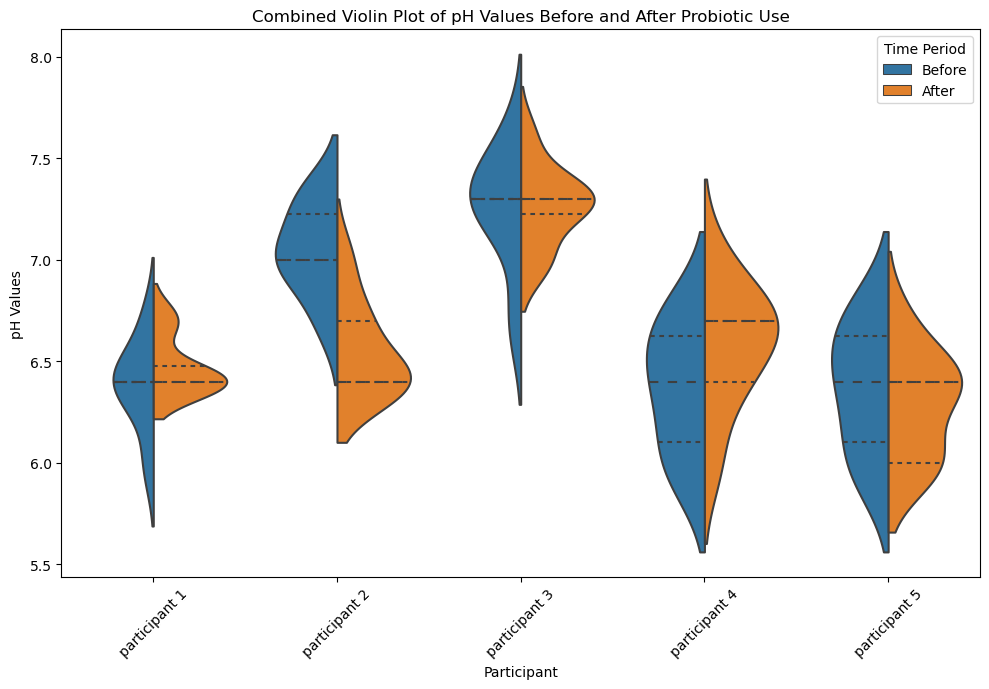

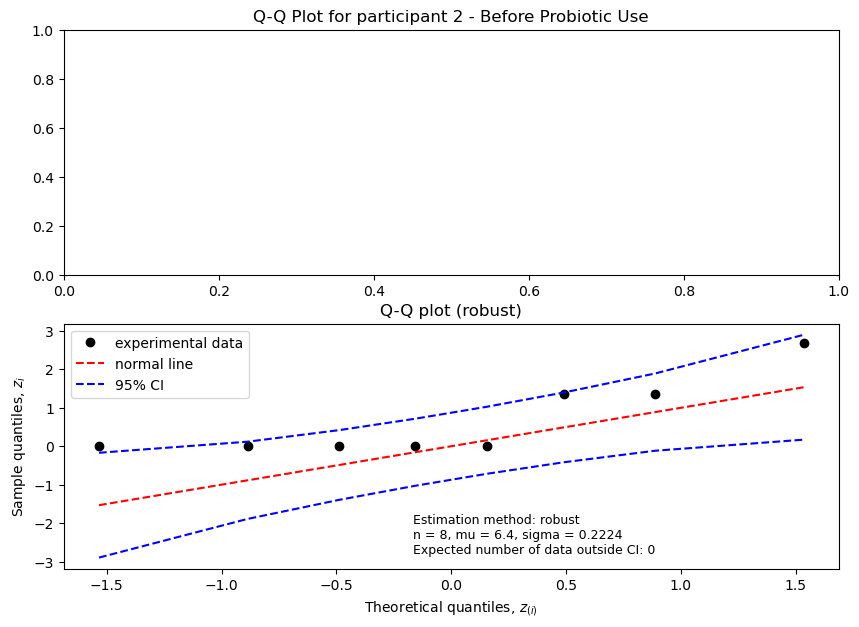

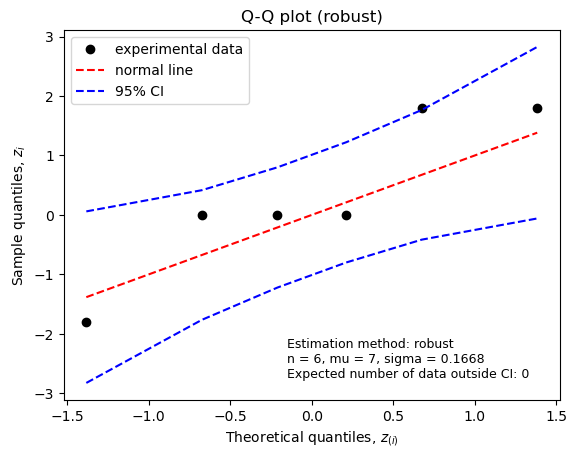

--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 7.05, s = 0.226, n = 6, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 0.477, AD* = 0.566, p-value = 0.143, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 6.55, s = 0.227, n = 8, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 1.06, AD* = 1.2, p-value = 0.00406, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2-sample Mann-Whitney U-test for 2

<Figure size 640x480 with 0 Axes>

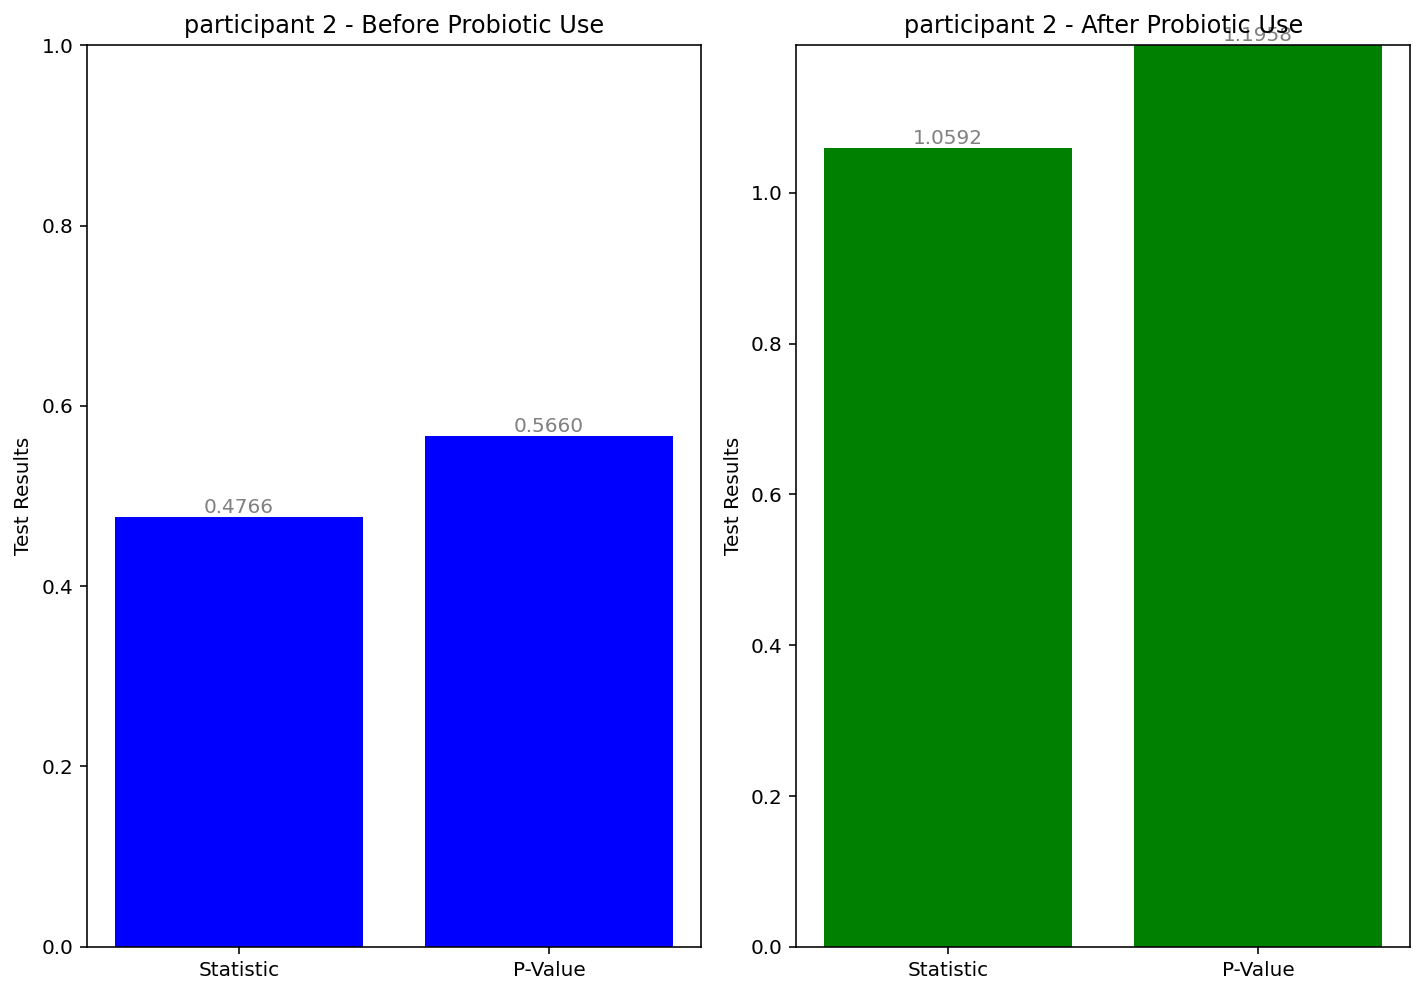

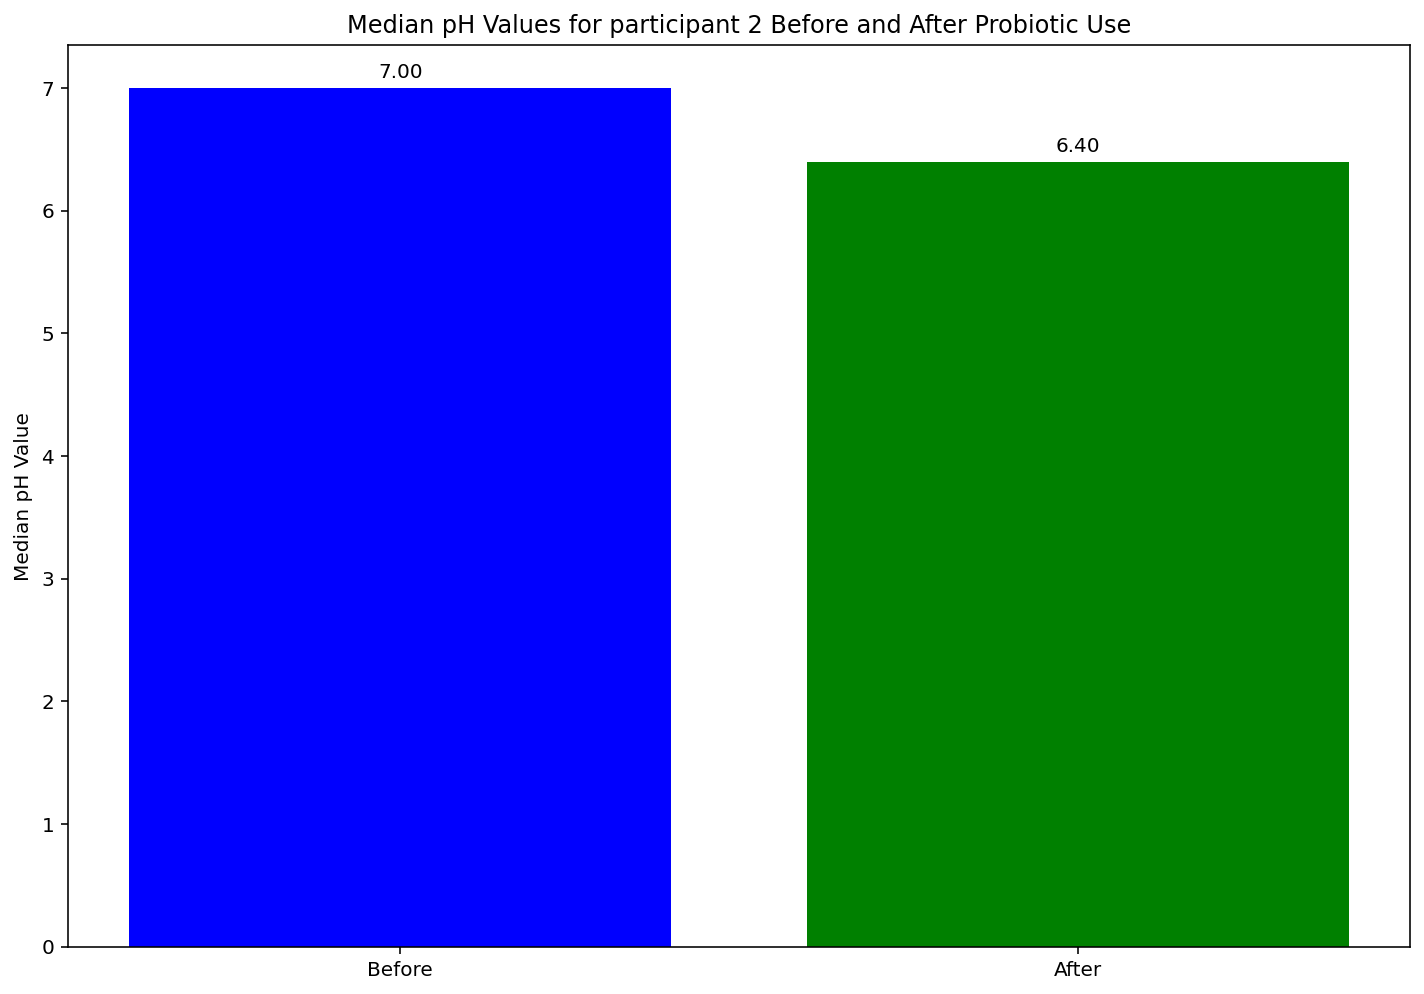

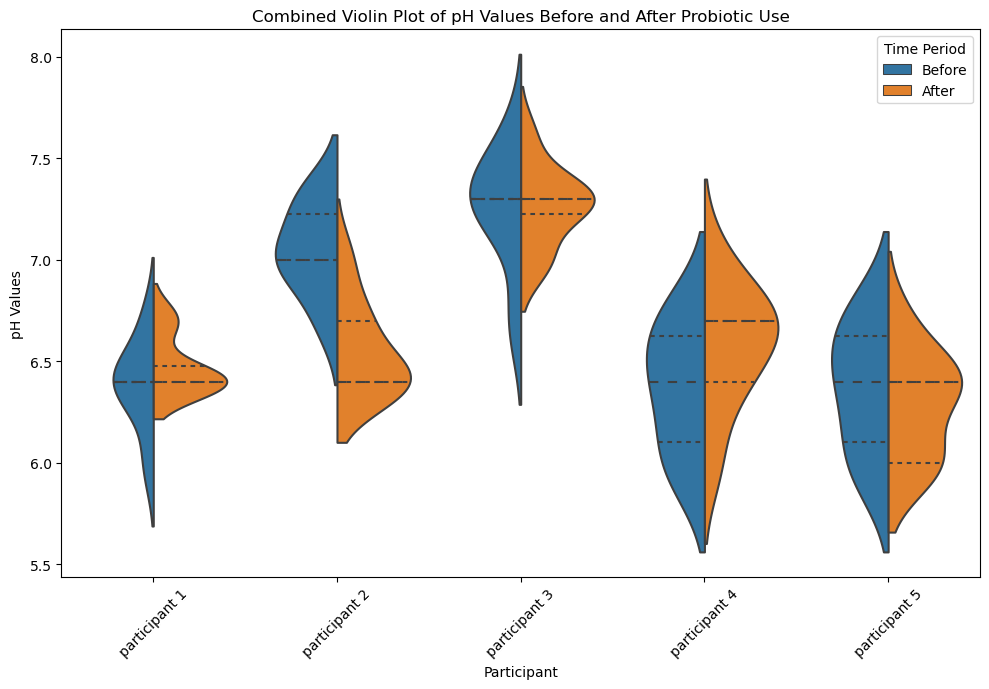

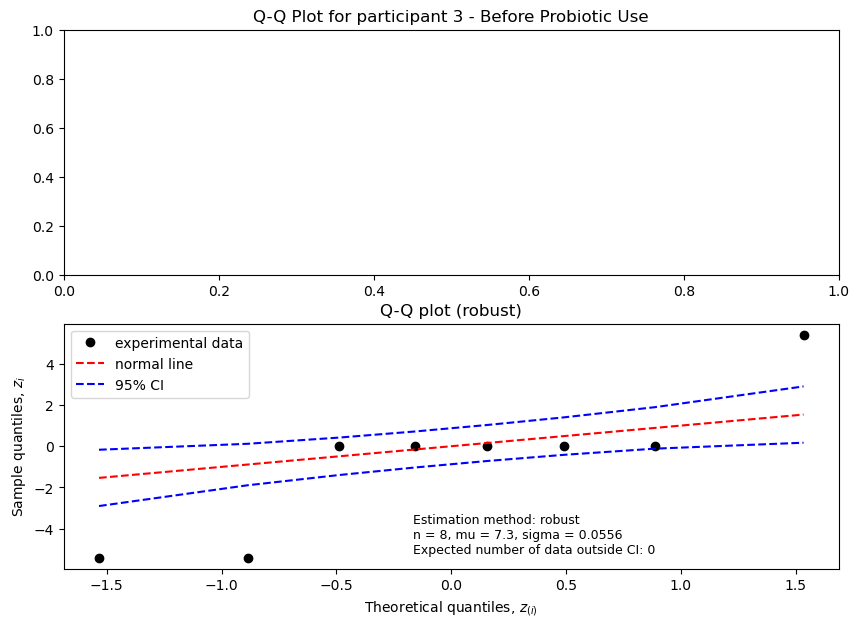

/homes/jvankampen/year 1/MicroMouth--Marvels/statistics_modules.py:77: RuntimeWarning: divide by zero encountered in divide
  z_i = (y_os - mu)/sigma
/homes/jvankampen/year 1/MicroMouth--Marvels/statistics_modules.py:77: RuntimeWarning: invalid value encountered in divide
  z_i = (y_os - mu)/sigma


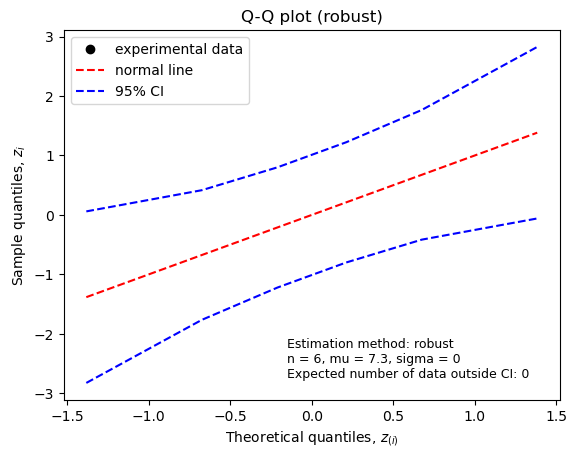

--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 7.25, s = 0.295, n = 6, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 0.841, AD* = 0.998, p-value = 0.0124, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 7.26, s = 0.192, n = 8, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 0.878, AD* = 0.992, p-value = 0.0129, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2-sample Mann-Whitney U-test fo

<Figure size 640x480 with 0 Axes>

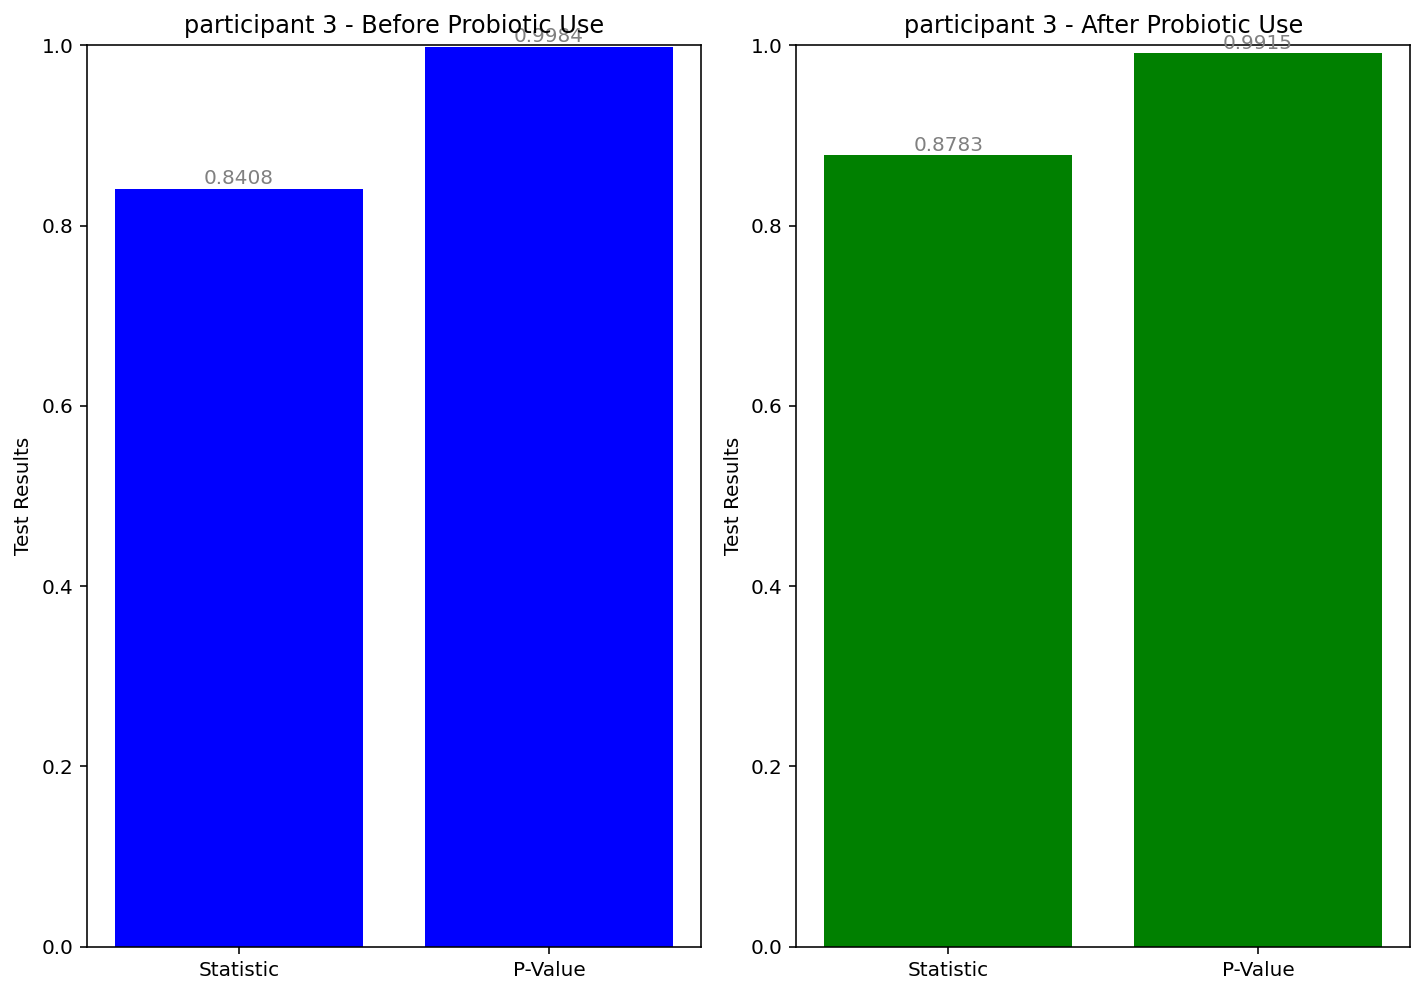

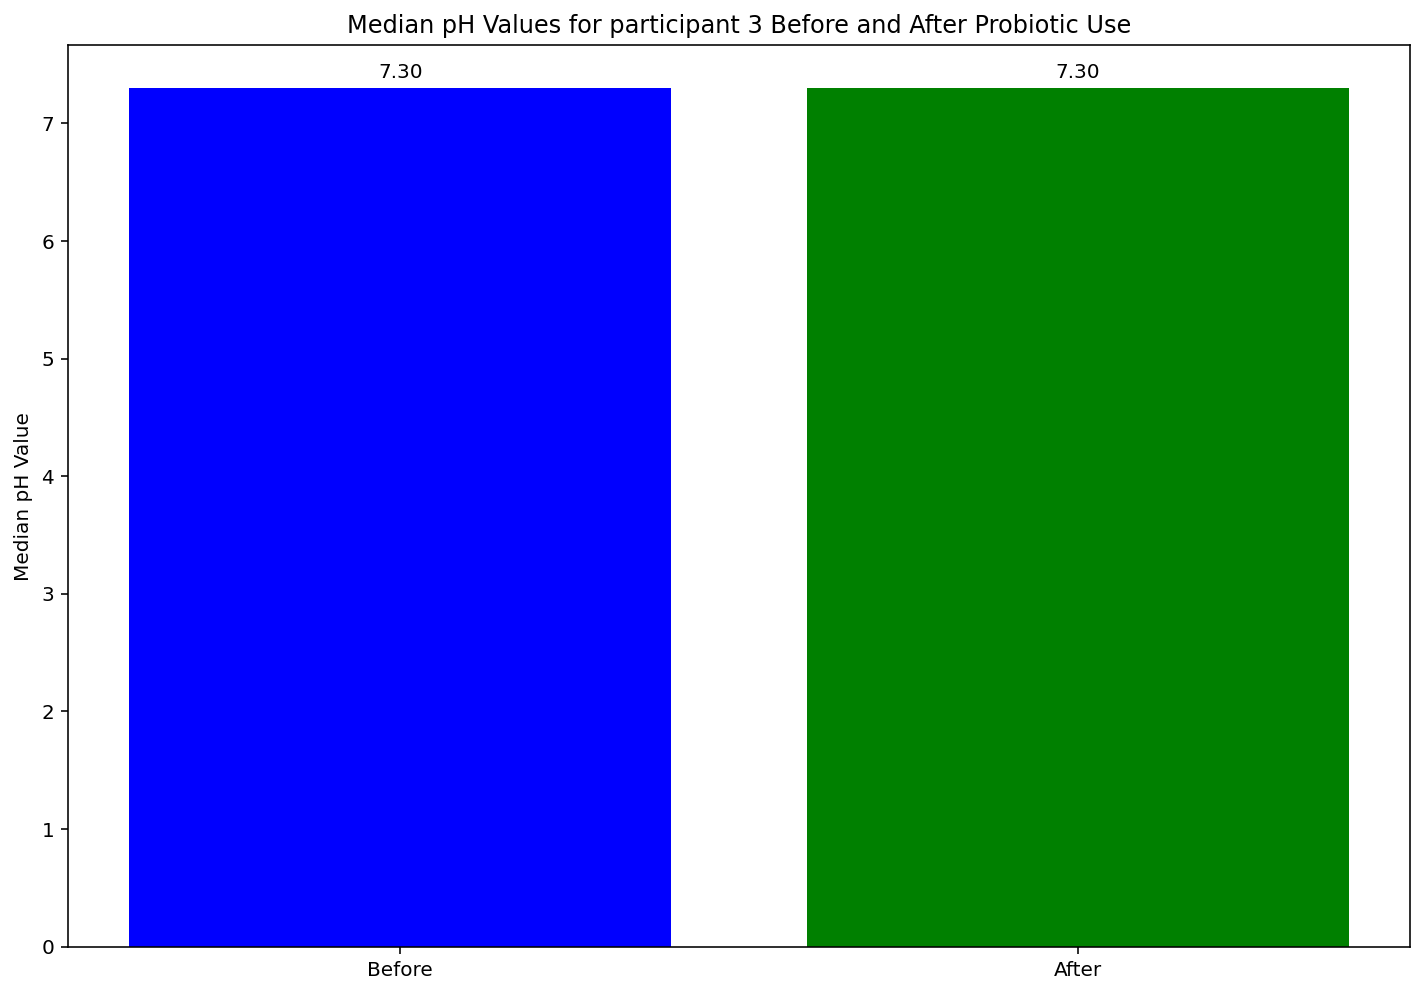

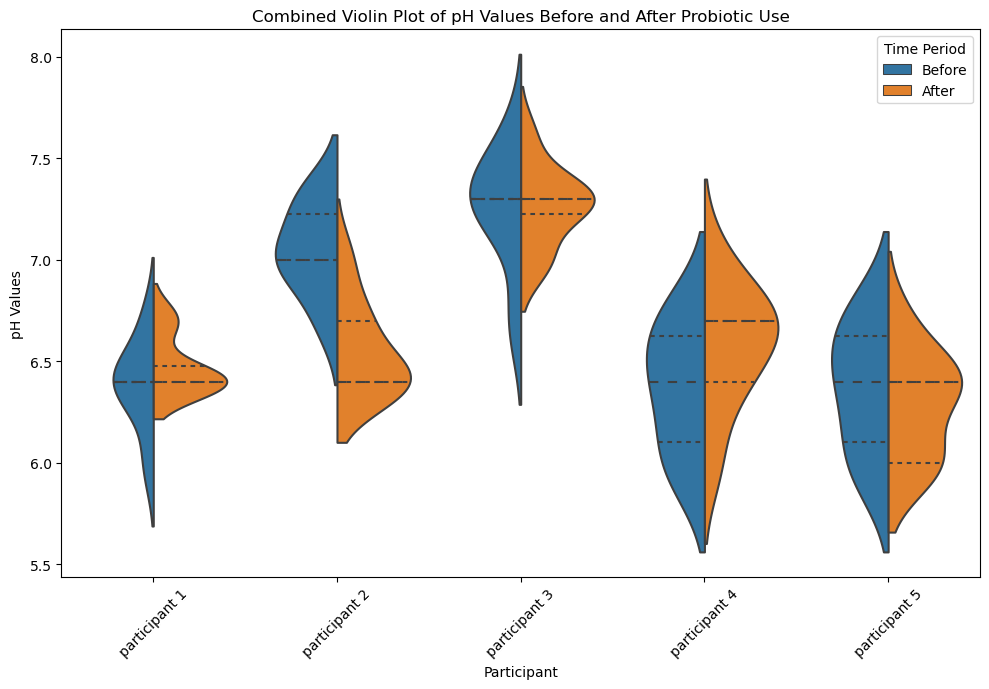

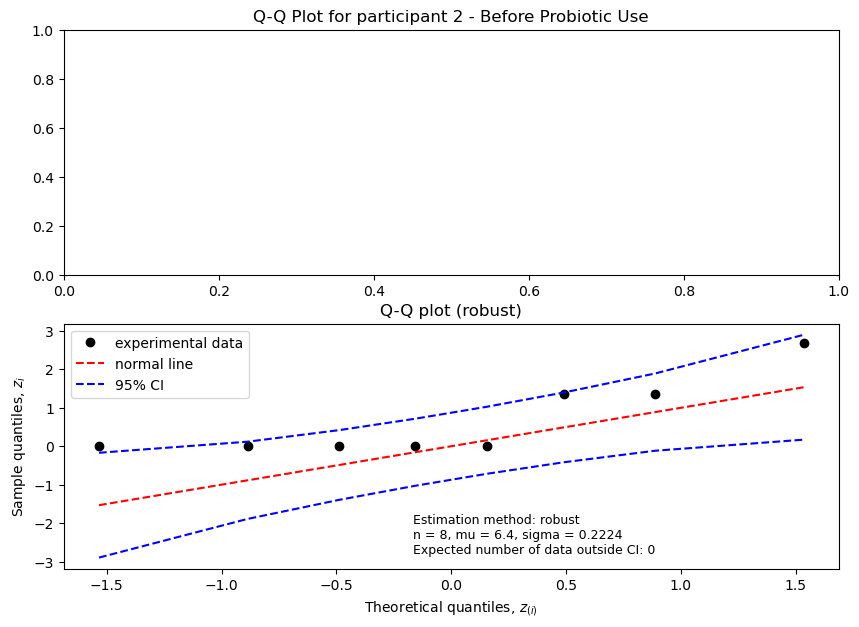

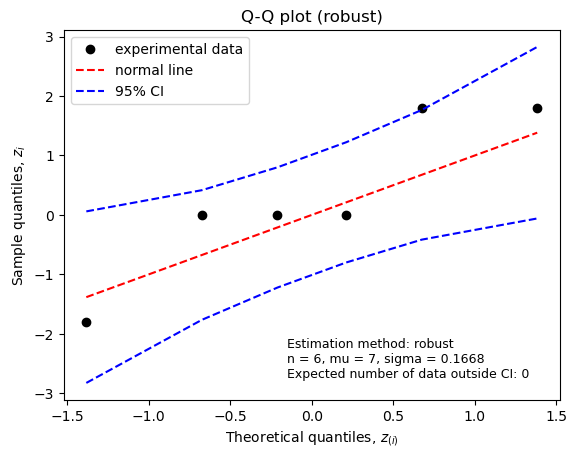

--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 7.05, s = 0.226, n = 6, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 0.477, AD* = 0.566, p-value = 0.143, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 6.55, s = 0.227, n = 8, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 1.06, AD* = 1.2, p-value = 0.00406, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2-sample Mann-Whitney U-test for 2

<Figure size 640x480 with 0 Axes>

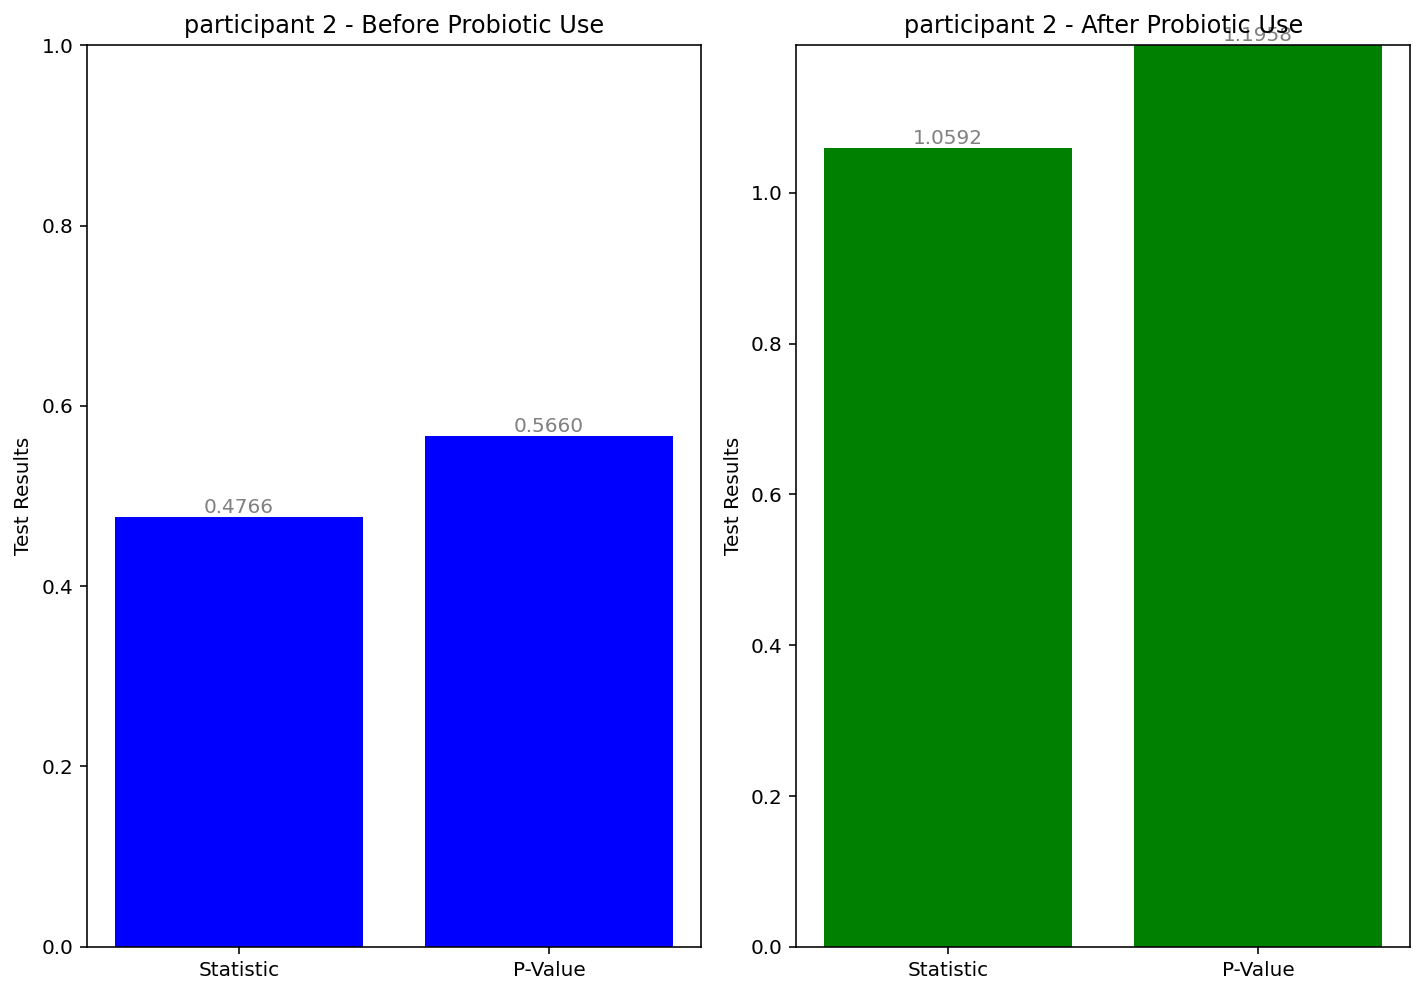

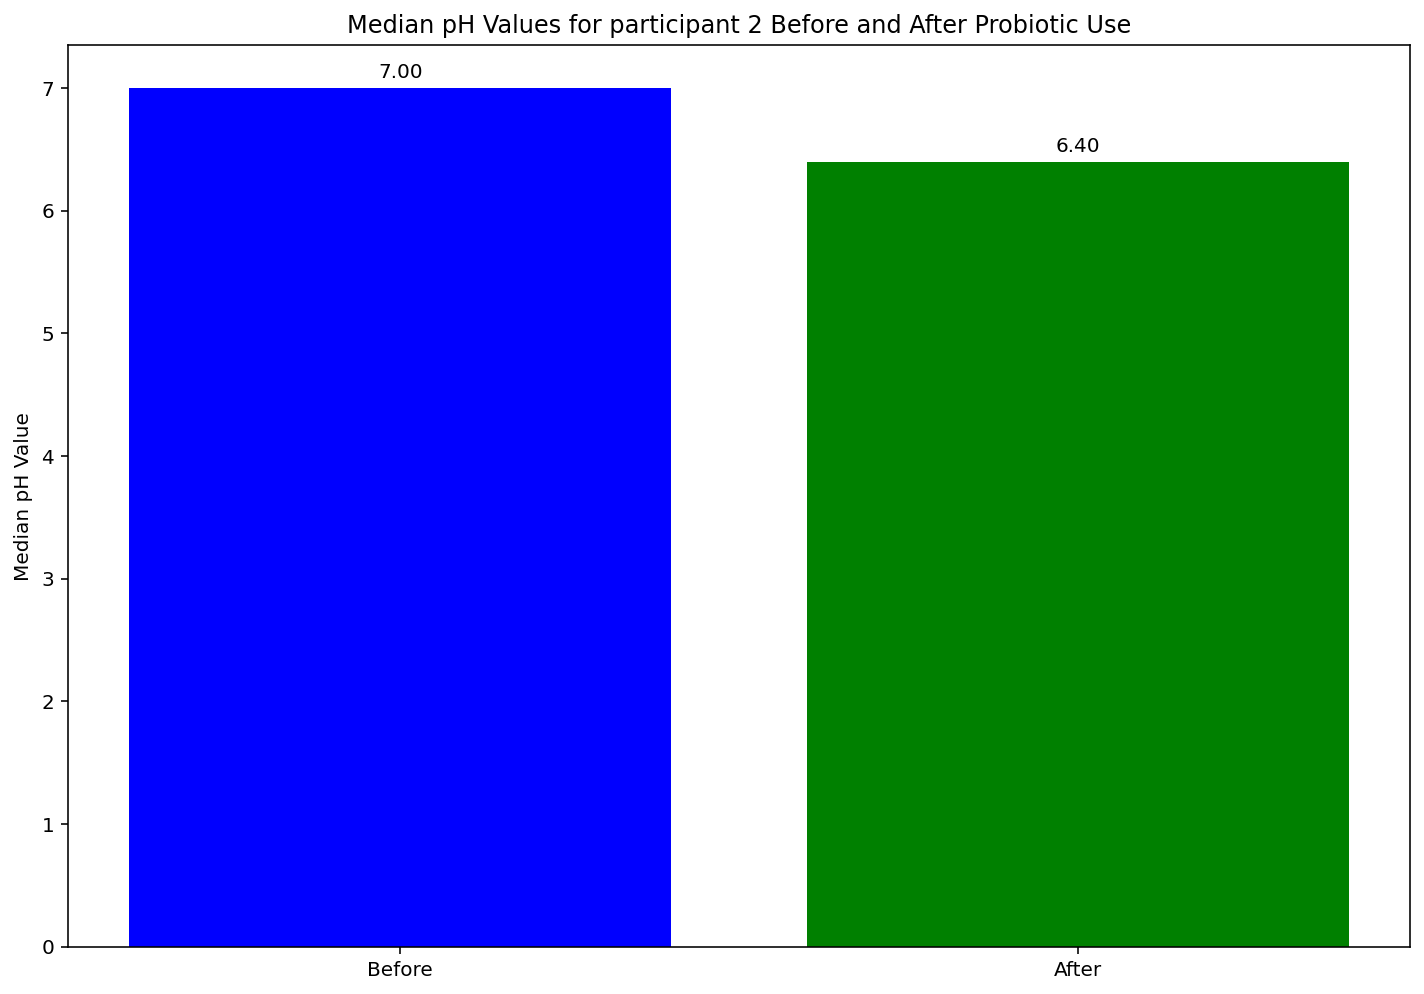

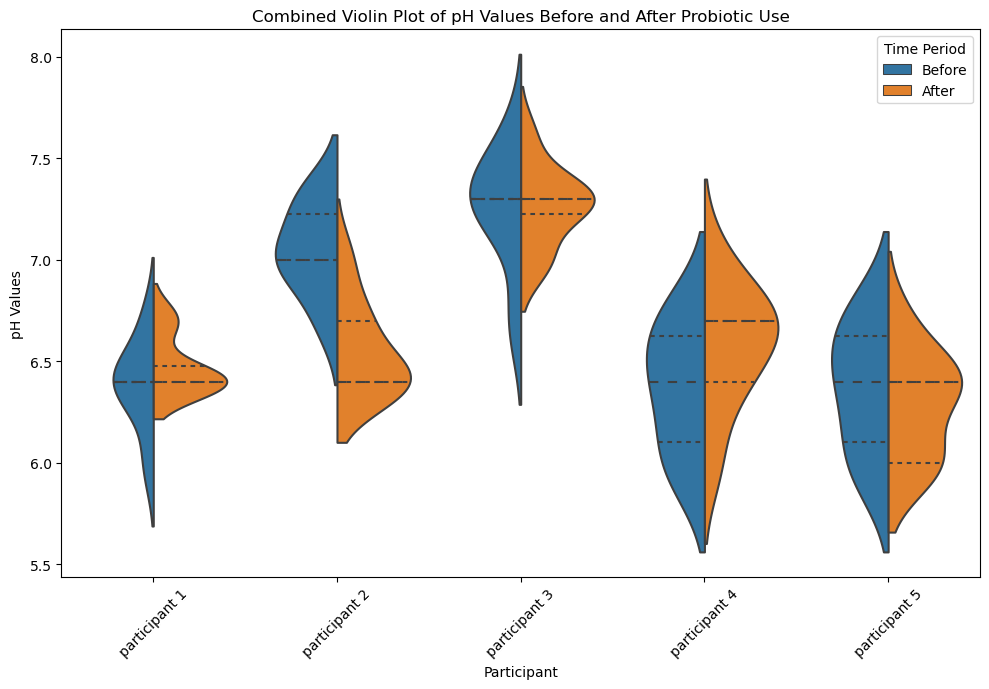

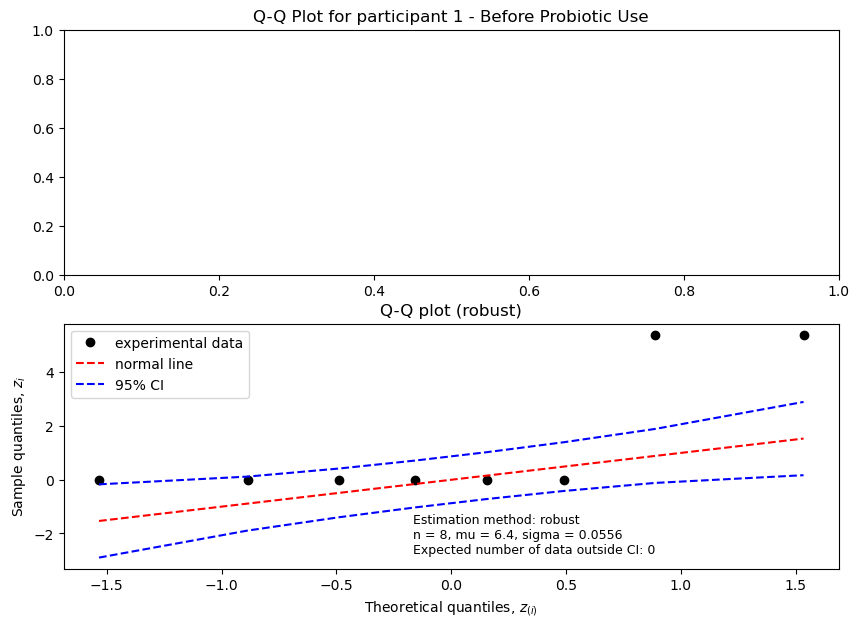

/homes/jvankampen/year 1/MicroMouth--Marvels/statistics_modules.py:77: RuntimeWarning: divide by zero encountered in divide
  z_i = (y_os - mu)/sigma
/homes/jvankampen/year 1/MicroMouth--Marvels/statistics_modules.py:77: RuntimeWarning: invalid value encountered in divide
  z_i = (y_os - mu)/sigma


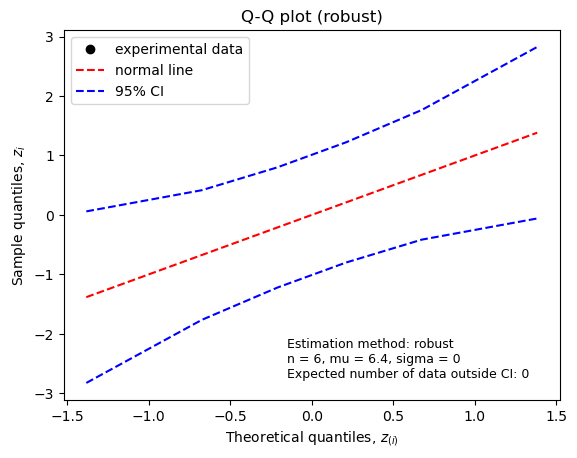

--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 6.38, s = 0.223, n = 6, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 0.739, AD* = 0.878, p-value = 0.0247, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 6.47, s = 0.139, n = 8, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 1.78, AD* = 2.01, p-value = 4.13e-05, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2-sample Mann-Whitney U-test fo

<Figure size 640x480 with 0 Axes>

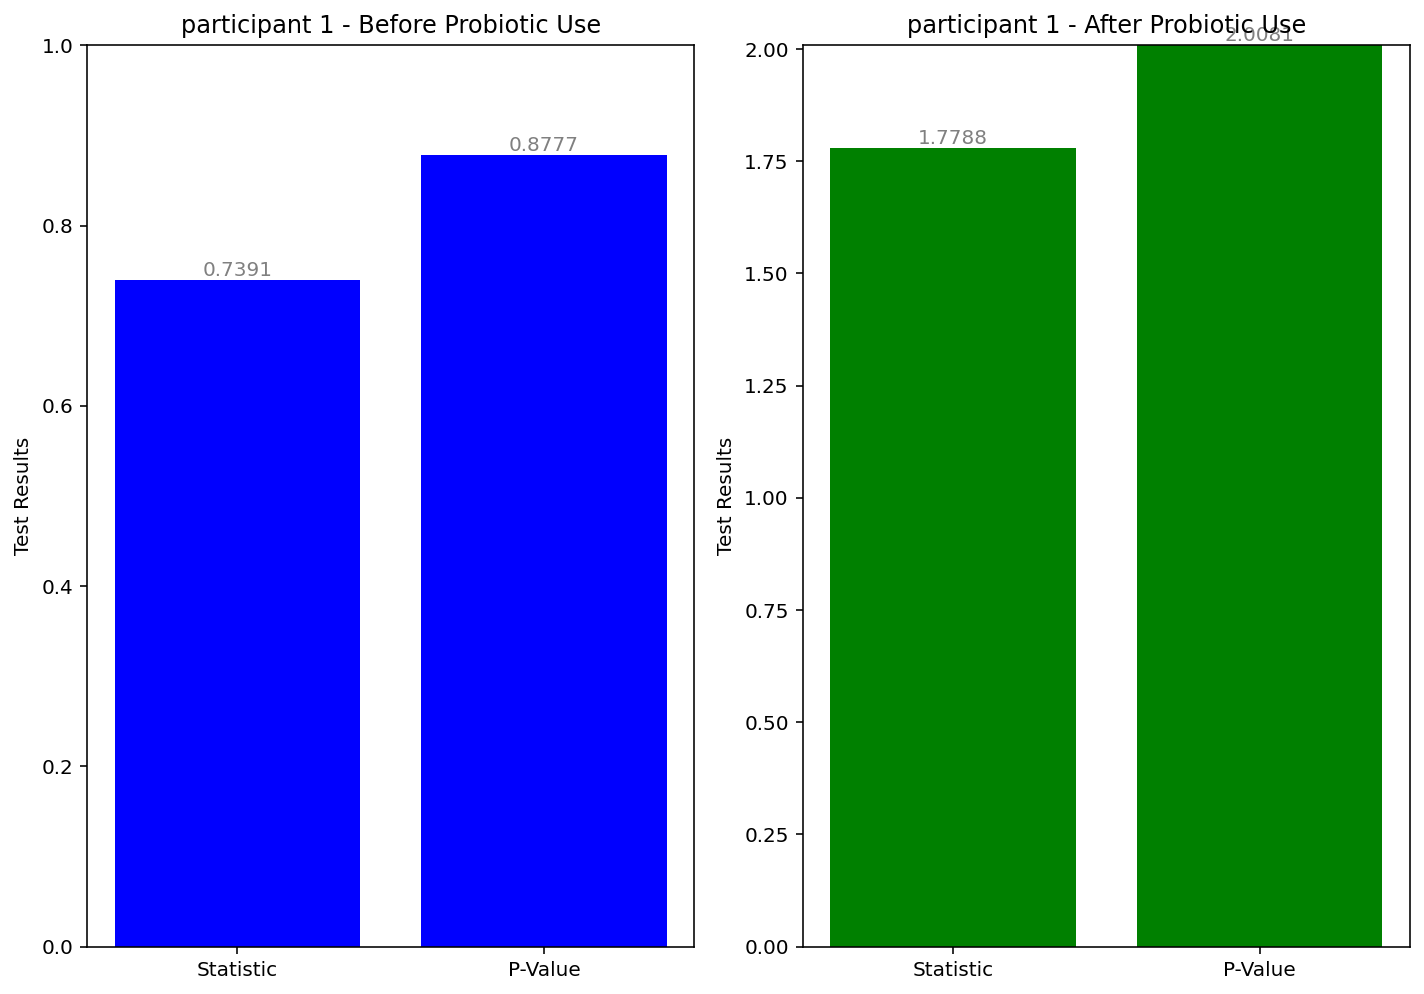

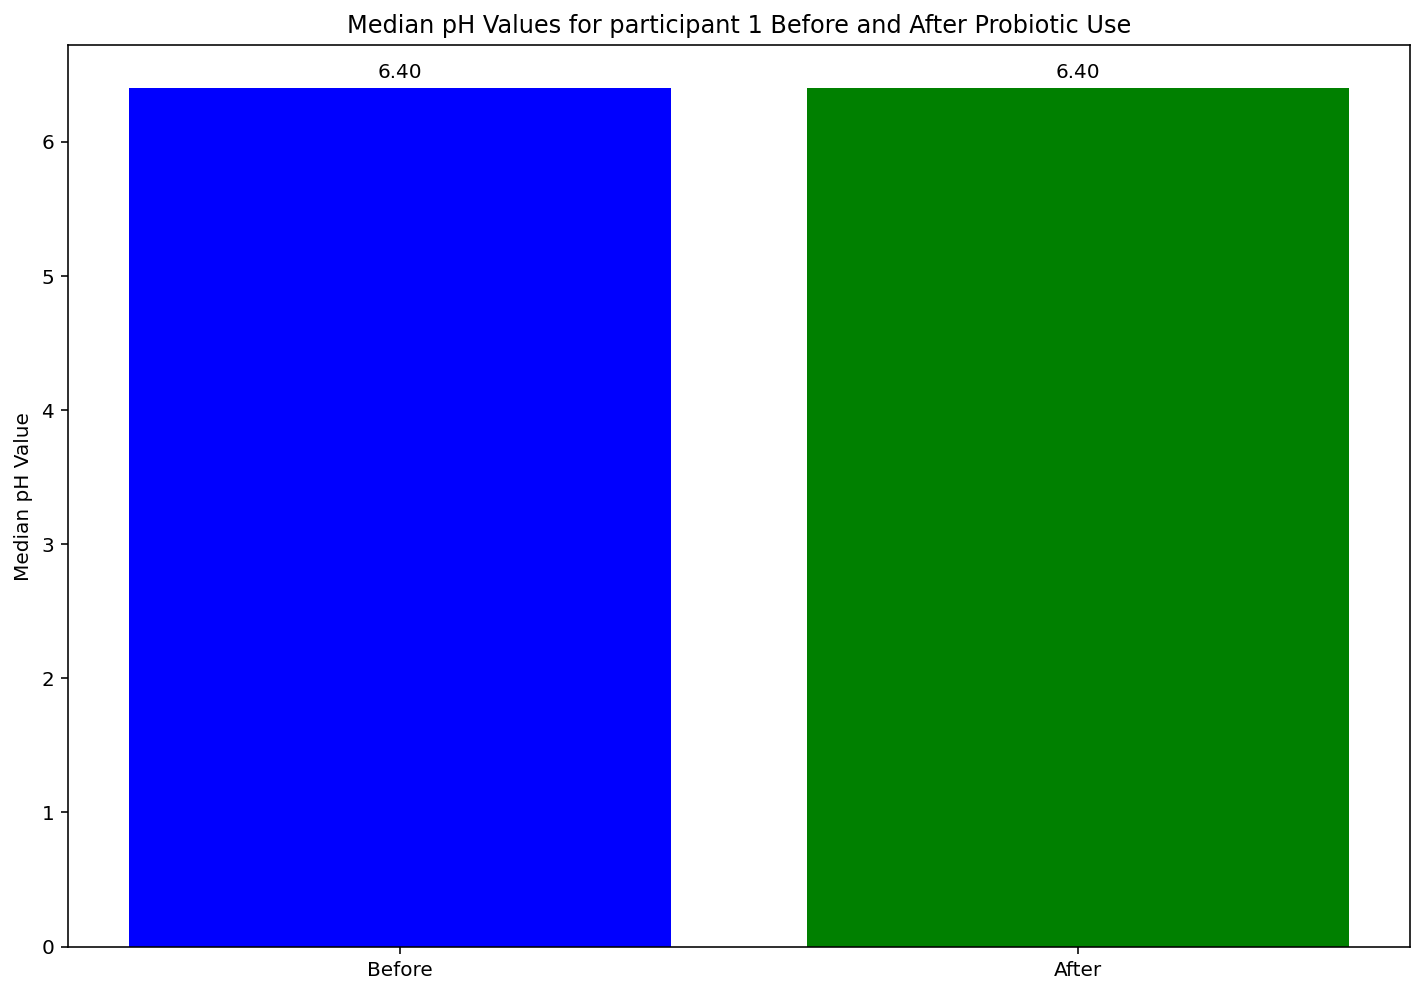

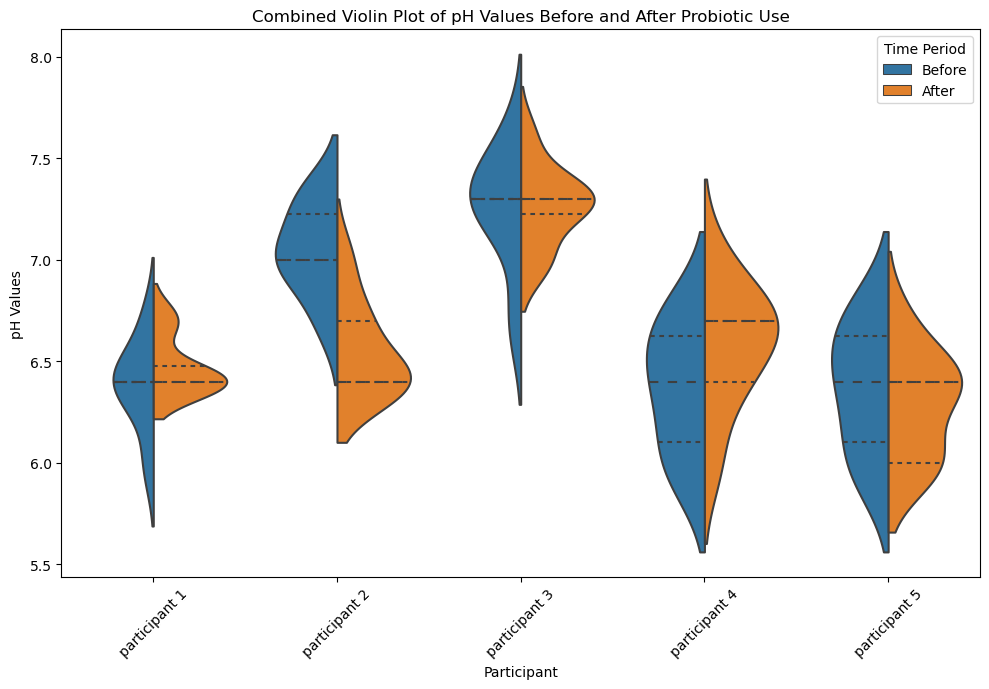

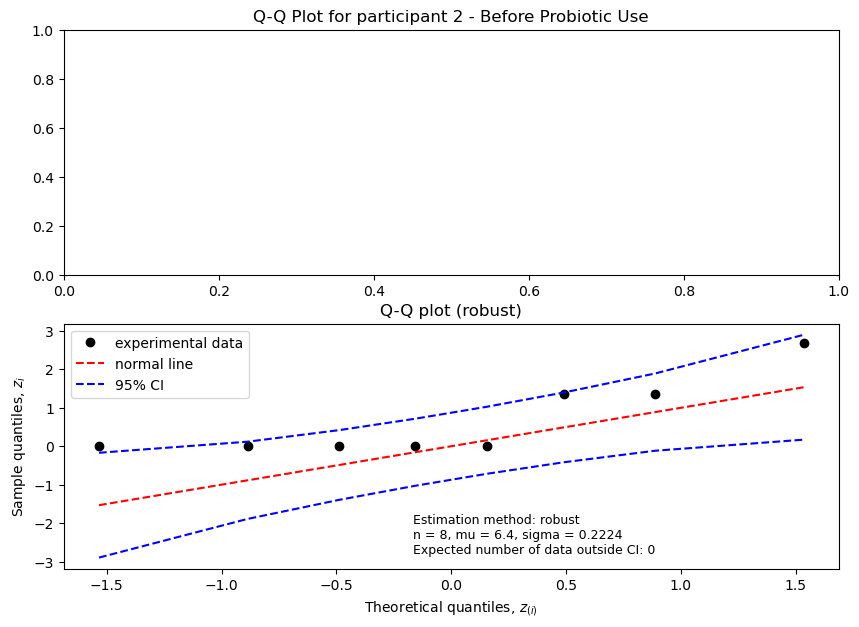

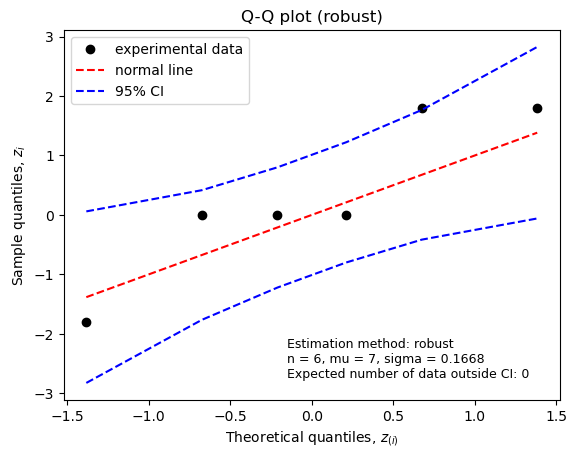

--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 7.05, s = 0.226, n = 6, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 0.477, AD* = 0.566, p-value = 0.143, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 6.55, s = 0.227, n = 8, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 1.06, AD* = 1.2, p-value = 0.00406, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2-sample Mann-Whitney U-test for 2

<Figure size 640x480 with 0 Axes>

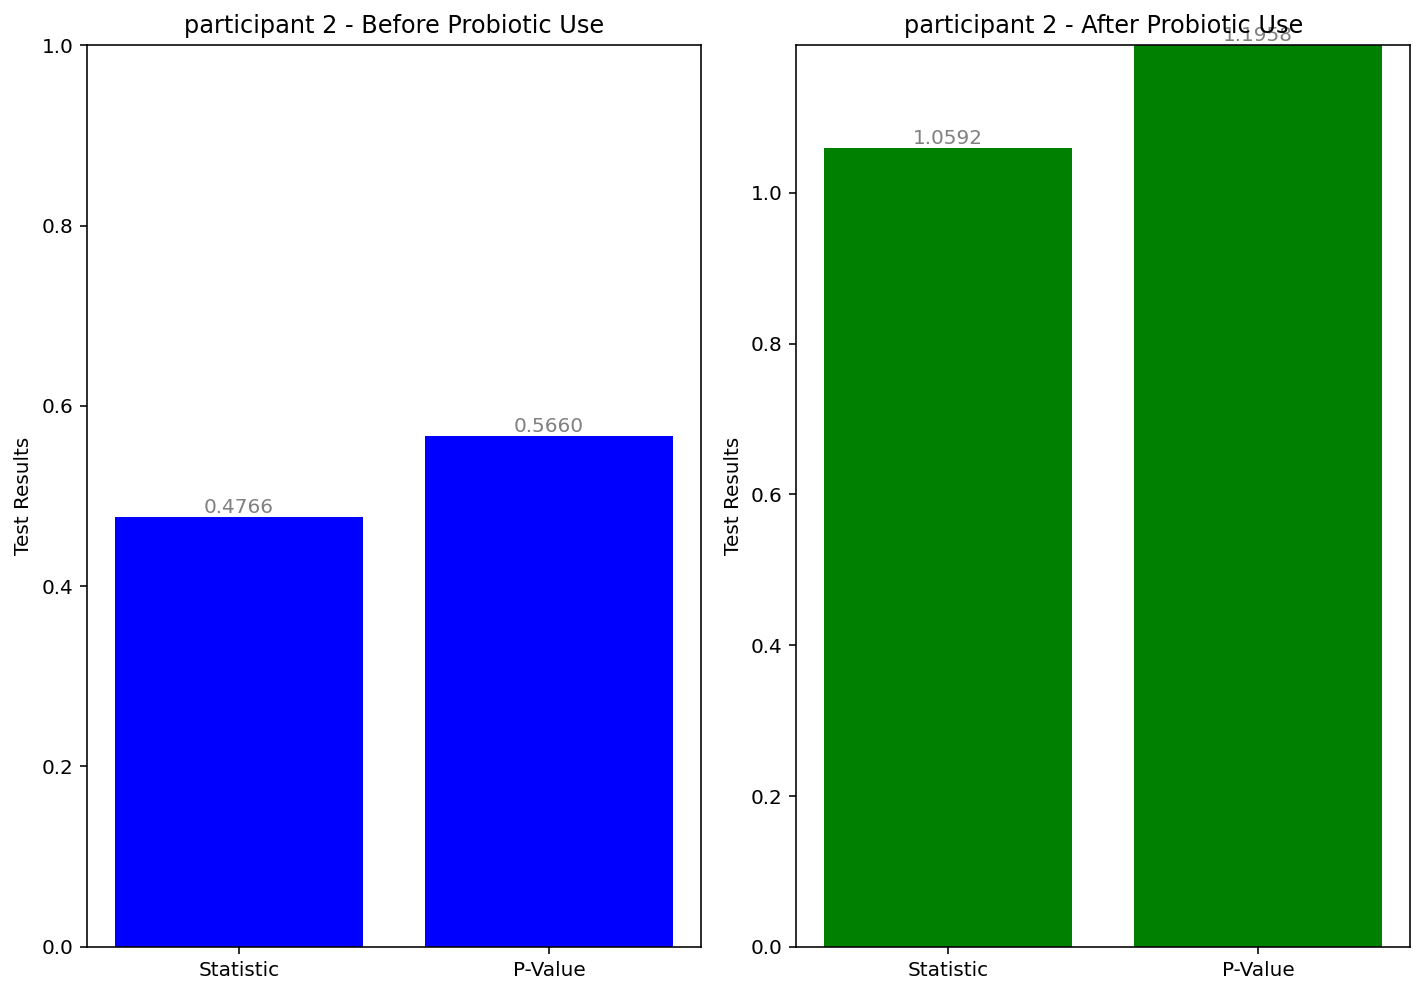

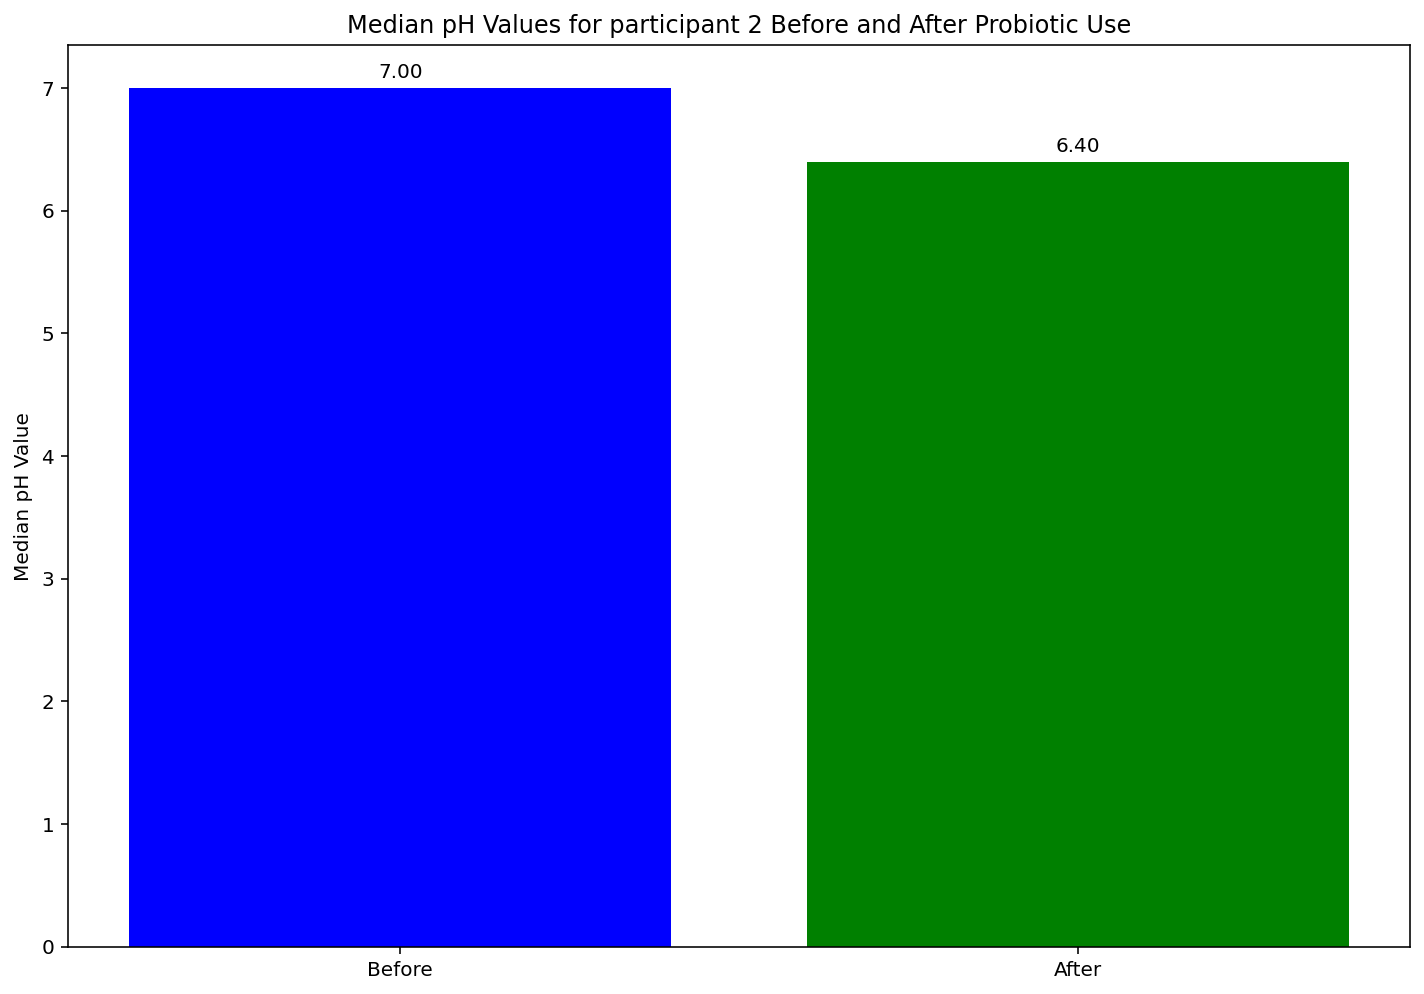

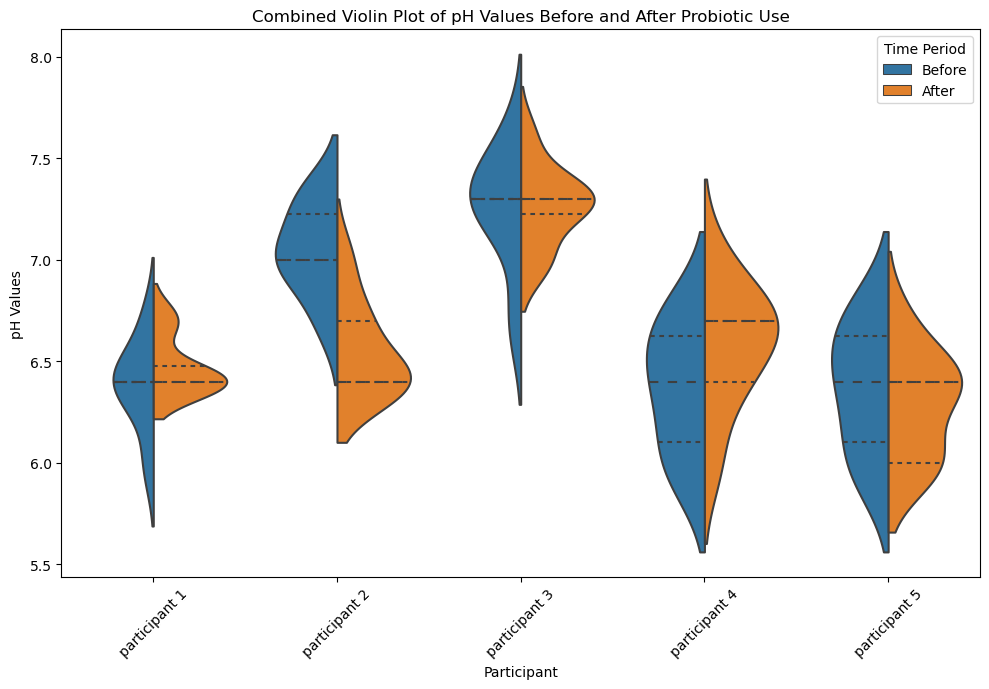

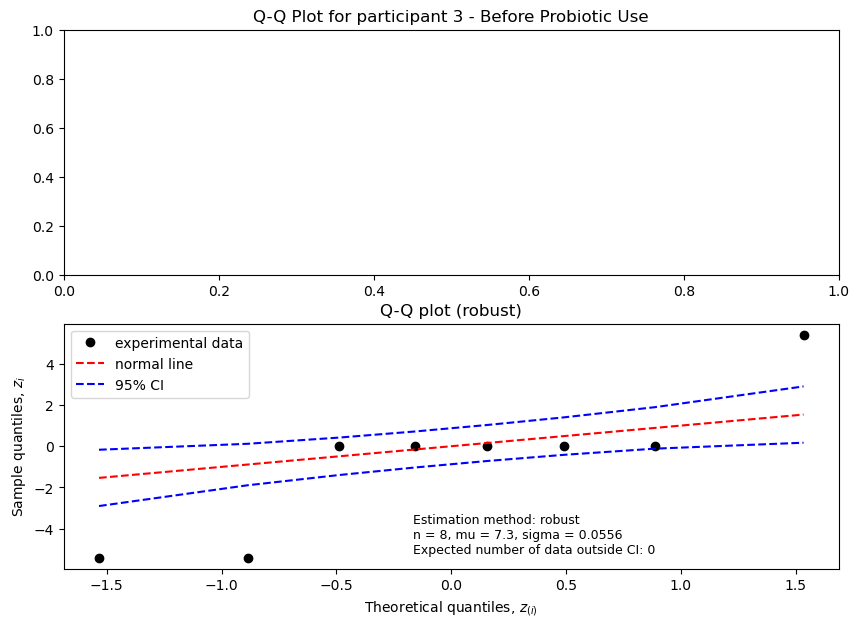

/homes/jvankampen/year 1/MicroMouth--Marvels/statistics_modules.py:77: RuntimeWarning: divide by zero encountered in divide
  z_i = (y_os - mu)/sigma
/homes/jvankampen/year 1/MicroMouth--Marvels/statistics_modules.py:77: RuntimeWarning: invalid value encountered in divide
  z_i = (y_os - mu)/sigma


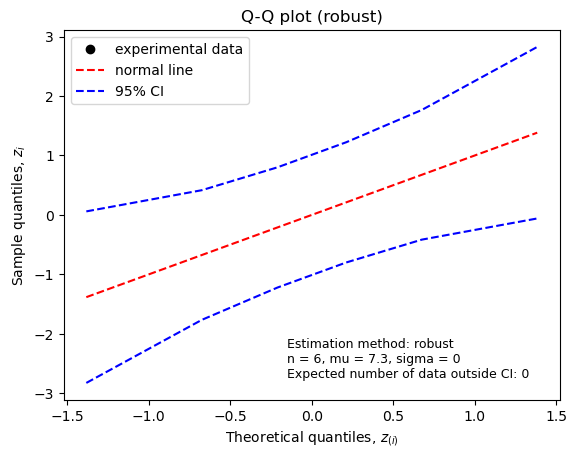

--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 7.25, s = 0.295, n = 6, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 0.841, AD* = 0.998, p-value = 0.0124, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 7.26, s = 0.192, n = 8, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 0.878, AD* = 0.992, p-value = 0.0129, AD*.crit = 0.753
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2-sample Mann-Whitney U-test fo

In [ ]:
#Ph statistic panel
df_before_ph_cleaned = df_before_ph.dropna()
df_after_ph_cleaned = df_after_ph.dropna()

# Sort both cleaned DataFrames by 'Weeks'
df_before_ph_sorted = df_before_ph_cleaned.sort_values(by='Weeks')
df_after_ph_sorted = df_after_ph_cleaned.sort_values(by='Weeks')

# Extract 'Weeks' for plotting
weeks_before = df_before_ph_sorted['Weeks']
weeks_after = df_after_ph_sorted['Weeks']

# Define function for plotting the combined violin plot
def plot_combined_violin():
    # Prepare 'before' data
    df_before_melted = df_before_ph_sorted.melt(id_vars=['Weeks'], var_name='Participant', value_name='pH_Values')
    df_before_melted['Time'] = 'Before'

    # Prepare 'after' data
    df_after_melted = df_after_ph_sorted.melt(id_vars=['Weeks'], var_name='Participant', value_name='pH_Values')
    df_after_melted['Time'] = 'After'

    # Combine data
    df_combined = pd.concat([df_before_melted, df_after_melted])

    # Create violin plot
    fig = plt.figure(figsize=(10, 7))
    sns.violinplot(x='Participant', y='pH_Values', hue='Time', data=df_combined, split=True, inner='quart')
    plt.title('Combined Violin Plot of pH Values Before and After Probiotic Use')
    plt.ylabel('pH Values')
    plt.xlabel('Participant')
    plt.legend(title='Time Period')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return fig

# Define function for generating Q-Q plot for a selected participant
def generate_qq_plot(participant):
    participant_str = str(participant)
    data_before = df_before_ph_sorted[participant_str].dropna()
    data_after = df_after_ph_sorted[participant_str].dropna()
    

    fig, axs = plt.subplots(2, 1, figsize=(10, 7))
    axs[0].set_title(f"Q-Q Plot for {participant_str} - Before Probiotic Use")
    pm.DS_Q_Q_Plot_before(data_before, est='robust')
    axs[1].set_title(f"Q-Q Plot for {participant_str} - After Probiotic Use")
    pm.DS_Q_Q_Plot_after(data_after, est='robust')
    plt.tight_layout()
    return fig
 
# Define function for generating Anderson-Darling visualization for a selected participant
def generate_anderson_darling_visualization(participant):
    participant_str = str(participant)
    data_before = df_before_ph_sorted[participant_str].dropna()
    data_after = df_after_ph_sorted[participant_str].dropna()
    result_before = pm.DS_AndersonDarling_test_normal(data_before)
    result_after = pm.DS_AndersonDarling_test_normal(data_after)
    fig, axes = plt.subplots(1, 2, figsize=(10, 7))
    axes[0].bar(['Statistic', 'P-Value'], [result_before[0], result_before[1]], color='blue')
    axes[0].set_title(f'{participant_str} - Before Probiotic Use')
    axes[0].set_ylim([0, max(result_before[0], result_before[1], 1)])
    axes[1].bar(['Statistic', 'P-Value'], [result_after[0], result_after[1]], color='green')
    axes[1].set_title(f'{participant_str} - After Probiotic Use')
    axes[1].set_ylim([0, max(result_after[0], result_after[1], 1)])
    for ax in axes:
        ax.set_ylabel('Test Results')
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                        textcoords='offset points')
    plt.tight_layout()
    return fig
    

# Define function for generating Mann-Whitney test visualization for a selected participant
def generate_mann_whitney_visualization(participant):
    participant_str = str(participant)
    data_before = df_before_ph_sorted[participant_str].dropna()
    data_after = df_after_ph_sorted[participant_str].dropna()
    test_result = pm.DS_2sample_MannWhitney_test_medians(data_before, data_after)
    u_statistic, p_value, *rest = test_result
    fig, ax = plt.subplots(figsize=(10, 7))
    medians = [data_before.median(), data_after.median()]
    ax.bar(['Before', 'After'], medians, color=['blue', 'green'])
    ax.set_title(f'Median pH Values for {participant_str} Before and After Probiotic Use')
    ax.set_ylabel('Median pH Value')
    for i, median in enumerate(medians):
        ax.text(i, median + 0.05, f'{median:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    return fig



# Function to update plot based on selected participant
def update_plot(event):
    participant = event.new
    fig1 = plot_combined_violin()
    fig2 = generate_qq_plot(participant)
    fig3 = generate_anderson_darling_visualization(participant)
    fig4 = generate_mann_whitney_visualization(participant)
    plot_pane1.object = fig1
    plot_pane2.object = fig2
    plot_pane3.object = fig3
    plot_pane4.object = fig4
    
# Create widgets for participants
participants = df_before_ph.columns[1:].tolist()
participant_selector = pn.widgets.Select(
    options=participants,
    value=participants[0],
    name='Participant'
)    
participant_selector.param.watch(update_plot, 'value')

plot_pane1 = pn.pane.Matplotlib()
plot_pane2 = pn.pane.Matplotlib()
plot_pane3 = pn.pane.Matplotlib()
plot_pane4 = pn.pane.Matplotlib()

participant_row= pn.Row(
    pn.Column(participant_selector),
    css_classes = ['panel-widget-box']
)

row_violin =pn.Row(
    pn.Column ('# Violin plot', plot_pane1),
    css_classes=['panel-widget-box']
)

row_qq_plt = pn.Row(
pn.Column ('# QQ_plot', plot_pane2),
    css_classes=['panel-widget-box']
)

row_anderson_darling = pn.Row(
pn.Column ('# Anderson_Darling', plot_pane3),
    css_classes=['panel-widget-box']
)

row_mann_whithey = pn.Row(
pn.Column ('# Mann_Whitney', plot_pane4),
    css_classes=['panel-widget-box']
)

dashboard_layout_data = pn.Column(
    participant_row,
    pn.Row(row_violin, row_qq_plt),
    row_anderson_darling, row_mann_whithey,
    css_classes=['panel-widget-box']
)

dashboard = pn.template.BootstrapTemplate(title='Dashboard MicroMouth Marvels', header_background='lightblue')
dashboard.main.append(dashboard_layout_data)
dashboard.show()

In [ ]:
df_before_plaque_cleaned = df_before_plaque.dropna()
df_after_plaque_cleaned = df_after_plaque.dropna()

# Sort both cleaned DataFrames by 'Weeks'
df_before_plaque_sorted = df_before_plaque_cleaned.sort_values(by='Weeks')
df_after_plaque_sorted = df_after_plaque_cleaned.sort_values(by='Weeks')

# Extract 'Weeks' for plotting
weeks_before = df_before_plaque_sorted['Weeks']
weeks_after = df_after_plaque_sorted['Weeks']

# Define function for plotting the combined violin plot
def plot_combined_violin():
    # Prepare 'before' data
    df_before_melted = df_before_plaque_sorted.melt(id_vars=['Weeks'], var_name='Participant', value_name='plaque_Values')
    df_before_melted['Time'] = 'Before'

    # Prepare 'after' data
    df_after_melted = df_after_plaque_sorted.melt(id_vars=['Weeks'], var_name='Participant', value_name='plaque_Values')
    df_after_melted['Time'] = 'After'

    # Combine data
    df_combined = pd.concat([df_before_melted, df_after_melted])

    # Create violin plot
    fig = plt.figure(figsize=(10, 7))
    sns.violinplot(x='Participant', y='plaque_Values', hue='Time', data=df_combined, split=True, inner='quart')
    plt.title('Combined Violin Plot for the amount of tooth with plaque before and after Probiotic Use')
    plt.ylabel('Amount of tooth with plaque')
    plt.xlabel('Participant')
    plt.legend(title='Time Period')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return fig

# Define function for generating Q-Q plot for a selected participant
def generate_qq_plot(participant):
    participant_str = str(participant)
    data_before = df_before_plaque_sorted[participant_str].dropna()
    data_after = df_after_plaque_sorted[participant_str].dropna()
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 7))
    axs[0].set_title(f"Q-Q Plot for {participant_str} - Before Probiotic Use")
    pm.DS_Q_Q_Plot_test(data_before, est='robust')
    axs[1].set_title(f"Q-Q Plot for {participant_str} - After Probiotic Use")
    pm.DS_Q_Q_Plot_test(data_after, est='robust')
    plt.tight_layout()
    return fig

# Define function for generating Anderson-Darling visualization for a selected participant
def generate_anderson_darling_visualization(participant):
    participant_str = str(participant)
    data_before = df_before_plaque_sorted[participant_str].dropna()
    data_after = df_after_plaque_sorted[participant_str].dropna()
    result_before = pm.DS_AndersonDarling_test_normal(data_before)
    result_after = pm.DS_AndersonDarling_test_normal(data_after)
    fig, axes = plt.subplots(1, 2, figsize=(10, 7))
    axes[0].bar(['Statistic', 'P-Value'], [result_before[0], result_before[1]], color='blue')
    axes[0].set_title(f'{participant_str} - Before Probiotic Use')
    axes[0].set_ylim([0, max(result_before[0], result_before[1], 1)])
    axes[1].bar(['Statistic', 'P-Value'], [result_after[0], result_after[1]], color='green')
    axes[1].set_title(f'{participant_str} - After Probiotic Use')
    axes[1].set_ylim([0, max(result_after[0], result_after[1], 1)])
    for ax in axes:
        ax.set_ylabel('Test Results')
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                        textcoords='offset points')
    plt.tight_layout()
    return fig

# Define function for generating Mann-Whitney test visualization for a selected participant
def generate_mann_whitney_visualization(participant):
    participant_str = str(participant)
    data_before = df_before_plaque_sorted[participant_str].dropna()
    data_after = df_after_plaque_sorted[participant_str].dropna()
    test_result = pm.DS_2sample_MannWhitney_test_medians(data_before, data_after)
    u_statistic, p_value, *rest = test_result
    fig, ax = plt.subplots(figsize=(10, 7))
    medians = [data_before.median(), data_after.median()]
    ax.bar(['Before', 'After'], medians, color=['blue', 'green'])
    ax.set_title(f'Median amount of teeth with plaque for {participant_str} Before and After Probiotic Use')
    ax.set_ylabel('Median amount of teeth with plaque')
    for i, median in enumerate(medians):
        ax.text(i, median + 0.05, f'{median:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    return fig



# Function to update plot based on selected participant
def update_plot(event):
    participant = event.new
    fig1 = plot_combined_violin()
    fig2 = generate_qq_plot(participant)
    fig3 = generate_anderson_darling_visualization(participant)
    fig4 = generate_mann_whitney_visualization(participant)
    plot_pane1.object = fig1
    plot_pane2.object = fig2
    plot_pane3.object = fig3
    plot_pane4.object = fig4
    
# Create widgets for participants
participants = df_before_ph.columns[1:].tolist()
participant_selector = pn.widgets.Select(
    options=participants,
    value=participants[0],
    name='Participant'
)    
participant_selector.param.watch(update_plot, 'value')

plot_pane1 = pn.pane.Matplotlib()
plot_pane2 = pn.pane.Matplotlib()
plot_pane3 = pn.pane.Matplotlib()
plot_pane4 = pn.pane.Matplotlib()

participant_row= pn.Row(
    pn.Column(participant_selector),
    css_classes = ['panel-widget-box']
)

row_violin =pn.Row(
    pn.Column ('# Violin plot', plot_pane1),
    css_classes=['panel-widget-box']
)

row_qq_plt = pn.Row(
pn.Column ('# QQ_plot', plot_pane2),
    css_classes=['panel-widget-box']
)

row_anderson_darling = pn.Row(
pn.Column ('# Anderson_Darling', plot_pane3),
    css_classes=['panel-widget-box']
)

row_mann_whithey = pn.Row(
pn.Column ('# Mann_Whitney', plot_pane4),
    css_classes=['panel-widget-box']
)

dashboard_layout_data = pn.Column(
    participant_row,
    pn.Row(row_violin, row_qq_plt),
    row_anderson_darling, row_mann_whithey,
    css_classes=['panel-widget-box']
)

dashboard = pn.template.BootstrapTemplate(title='Dashboard MicroMouth Marvels', header_background='lightblue')
dashboard.main.append(dashboard_layout_data)
dashboard.show()
